#Business Understanding
The dataset is a collection of URLs followed by various attributes of the website and of the url itself. Each URL is assigned a Label that indicates whether the link is a phishing or legitimate site. The dataset was gathered to study and detect phishing websites. Phishing is one of the most prominent hacking methods used commonly. The method has been proven to evade human intuition and work on even the most vigilant victims. Phishing victims are subject to financial loss and reputational damages depending on the motive of the bad actors. This creates plenty of motivation for organizations to effectively detect and block potential phishing URLs before users even have an opportunity to click on them. In our particular dataset, we use the "label" attribute to determine if a URL is a legitimate or phishing link. (1 = Legitimate and 0 = Phish Link) If phishing and legitimate URLSs show different patterns, then the dataset provides useful knowledge for our prediction model. Attributes such as HasCopyrightInfo and HasSocialNet indicate some correlation with classifying as a legitimate link, inversely SpecialCharRatioinURL has correlation with phishing links. These attribute displaying correlation towards a specific label gives us confidence that the data collected is "useful". A prediction model for capturing phishing links should prioritize detecting as many phishing URLs as possible, even at the expense of more flagging legitimate links. In practice, it is imperative to detect phishing links because these are the methods that could potentially be exploited and flagging legitimate links have much smaller consequences.

Source: Prasad, A., & Chandra, S. (2023). PhiUSIIL: A diverse security profile empowered phishing URL detection framework based on similarity index and incremental learning. Computers & Security, 103545. doi: https://doi.org/10.1016/j.cose.2023.103545

##Data Understanding
###Attribute Meaning and Data Type

##Identification and Text (Characters)
FILENAME
- ID of the origianl Text file or record for the URL

URL
- Full Website Address

Domain
- Main domain part of the URL

TLD
- Top-Level Domain

Title
- Page Title

##Lengths (Numeric)
URLLength
- Number of char in the full URL

DomainLength
- Number of char in domain

TLDLength
- Number of char in the TLD
  
NoOfSubDomain
- Count of subdomain in the URL

NoOfObfuscatedChar
- Count of obfuscated char

NoOfLettersInURL
- Count of letters in the URL (a-z,A-Z)

NoOfDegitsInRUL
- Digit Count in URL
- 
NoOfEqualsInURL/NoOfQMarkInURL/NoOfAmpersandInURL/NoOfOtherSpecialCharsInURL
- Counts of types of special char in the URL

LineOfCode
- Totalnumber of lines of HTML code on the page

LargestLineLength
- Length of longest line of HTML

NoOfURLRedirct/NoOfSelfRedirect
-Number of URL redirects and redirects to the same domain

NoOfPopup/NoOfiFrame
- Number of popups and iFrames

NoOfImage/NoOfCSS/NoOfJS
- Count of images, CSS files, and JS Files
- 

NoOfSelfRef/NoOfEmptyRef/NoOfExternalRef
- Number of links on page (internal,empty,external)


##Ratios,Probabilities, and Similarity Scores ("Oh My") (Numeric/Floating Point)
URLSimilarityIndex
- Similarity Score between URL and Index Reference

CharContinuationRate
- Rate at which char repeat patterns (Randomness)
  
TLDLegitimateProb
- Probability that TLD is associated with legitimate sites

URLCharProb
- Probability score based on char distribution in URL
  
ObfuscationRatio
- Proportion of obfuscated char relative to length of URL
  
LetterRatioInURL/DegitRatioInURL
-Char and Num ratio relative to URL Length

SpacialCharRatioInURL
- Ratio of special char in URL

DomainTitleMatchScore/URLTitleMatchScore
- Similarity scores between domain or URL Text and the page title

##Binary Flag (Numeric 1 or 0)
IsDomainIP
- 1 = If the domain is an IP addr
  
HasObfuscation
- 1= URL has obfuscation patterns

IsHTTPS  
- 1 = The url uses HTTPS

HasTitle  
- 1 = The page has a non-empty HTML Title

HasFavicon  
- 1 = Site has a favicon

Robots
- 1 = a robot.txt file is present

IsResponsive
- 1 = The site is responsivle (Adaptive)

HasDescription
- 1 = Page has a meta description

HasExternalFormSubmit
- 1= If a form submits to an external domain


HasSocialNet
- 1 = Social Media links are present

HasSubmitButton/HasHiddenFields/HasPasswordField  
- 1 = Presence of submit buttons, hidden forms and password fields
  
Bank/Pay/Crypto  
- 1 = Page is related to financial topics

HasCopyrightInf
- 1 = Copyright info is present

#Target (Binary 1/0)
label 
- 1 = Legitimate Website

In [166]:
#Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [167]:
#Importing Dataset and quick head view and dimension check (235795, 56)
import pandas as pd
from IPython.display import display

df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

display(df.head())
display(df.shape)

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   
3               100.0              1.000000           0.522907  ...    1   
4               100.0              1.000000           0.079963  ...    1   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  

[5 rows x 56 columns]

(235795, 56)

In [168]:
#Viewing all Features/Attributes
df.info()
df.describe()
#df['label'].value_counts()
#df['label'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050747       2.000000   
50%                1.000000           0.079963       0.057970       3.000000   
75%                1.000000           0.522907       0.062875       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  ...            Pay         Crypto  \
count  235795.000000   235795.000000  ...  235795.000000  235795.000000   
mean        1.164758        0.002057  ...       0.237007       0.023474   
std         0.600969        0.045306  ...       0.425247       0.151403   
min         0.000000        0.000000  ...       0.000000       0.000000   
25%         1.000000        0.000000  ...       0.000000       0.000000   
50%         1.000000        0.000000  ...       0.000000       0.000000   
75%         1.000000        0.000000  ...       0.000000       0.000000   
max        10.000000        1.000000  ...       1.000000       1.000000   

       HasCopyrightInfo      NoOfImage        NoOfCSS         NoOfJS  \
count     235795.000000  235795.000000  235795.000000  235795.000000   
mean           0.486775      26.075689       6.333111      10.522305   
std            0.499826      79.411815      74.866296      22.312192   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       8.000000       2.000000       6.000000   
75%            1.000000      29.000000       8.000000      15.000000   
max            1.000000    8956.000000   35820.000000    6957.000000   

         NoOfSelfRef   NoOfEmptyRef  NoOfExternalRef          label  
count  235795.000000  235795.000000    235795.000000  235795.000000  
mean       65.071113       2.377629        49.262516       0.571895  
std       176.687539      17.641097       161.027430       0.494805  
min         0.000000       0.000000         0.000000       0.000000  
25%         0.000000       0.000000         1.000000       0.000000  
50%        12.000000       0.000000        10.000000       1.000000  
75%        88.000000       1.000000        57.000000       1.000000  
max     27397.000000    4887.000000     27516.000000       1.000000  

[8 rows x 51 columns]

Target Variable Distribution:
  1: 134,850 (57.19%)
  0: 100,945 (42.81%)

Imbalance Ratio: 1.34:1


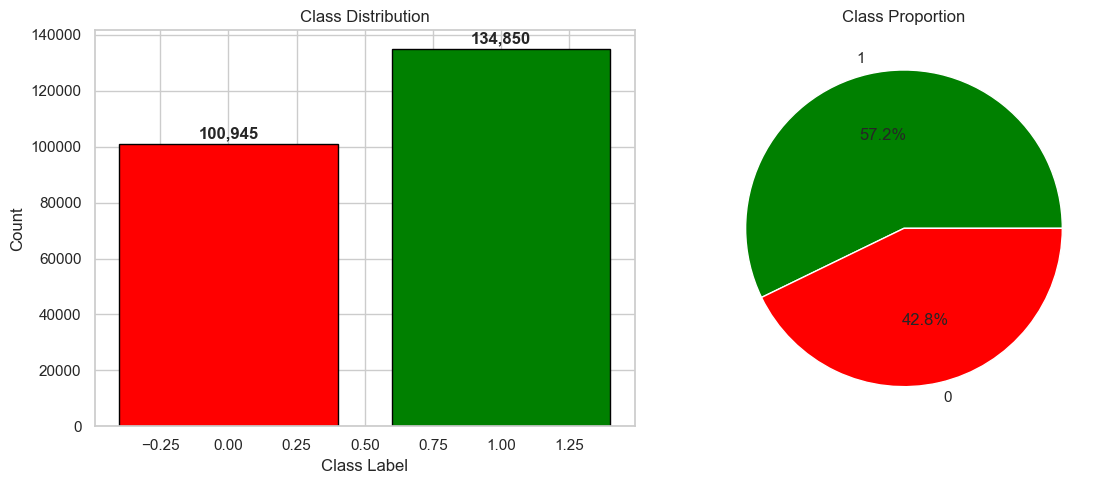

In [169]:
label_counts = df['label'].value_counts()
label_percentages = df['label'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print("="*40)
for label in label_counts.index:
    print(f"  {label}: {label_counts[label]:,} ({label_percentages[label]:.2f}%)")

# Imbalance ratio
imbalance_ratio = label_counts.max() / label_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
colors = ['Green', 'Red']  # Green for legit, red for phishing
ax1 = axes[0]
bars = ax1.bar(label_counts.index, label_counts.values, color=colors, edgecolor='black')
ax1.set_xlabel('Class Label')
ax1.set_ylabel('Count')
ax1.set_title('Class Distribution')
for bar, count in zip(bars, label_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(label_counts.values, labels=label_counts.index,autopct='%1.1f%%', colors=colors,)
ax2.set_title('Class Proportion')

plt.tight_layout()
plt.show()

#Data Quality
##Missing Data
There are no missing data in this data set.

##Duplicates
There are a total of 425 records that have been identifed as duplicates. After analyzing the dupes, it seems the records are very close, often differing by a single unit in a few features for each duplicate record., This is likely due to some error in the collection. Possibly collecting the data at different times and aggregegating the results causing slight differences. Either way, we are going to remove any duplicated data in order to reduce any concern in the quality of the data. Since 425 records is roughly 0.002% of the total amount of records, the affect that the removal has, should be minimal. 

In [171]:
#Data Quality
##Missing Data
### There are no missing values in this dataset

###PreCleaned)
print("Shape")
display(df.shape)

###Empty Row Count
print("Empty Row Count")
empty_rows = df.isna().all(axis=1)
display(empty_rows.sum())
display(df.isna().sum())

##Duplicates
###Duplicate Rows
print("Duplicate Row")
display(df.duplicated().sum())

###Duplicate URLs (425) 
### Some reason each urllength is increased by 1. and other values are off by a miniscule. It is safe to just drop all dupes
display(df.duplicated(subset=["URL"]).sum())

dup_url_mask = df.duplicated(subset=["URL"], keep=False)
dup_groups = df[dup_url_mask].sort_values("URL")

dup_groups.head(20)

df_dedup = df.drop_duplicates(subset=["URL"], keep="first")

print("Post De-Dup")
df_dedup.shape


Shape


(235795, 56)

Empty Row Count


0

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

Duplicate Row


0

425

Post De-Dup


(235370, 56)

#Summary Stats of Important Variables
Through preliminary analysis, there are many candidates that could be considered as the most important attributes. The attributes below are some the visually identifiable features that should have a large effect on any prediction model. 
Through these summary statistics, legitimate pages typically are large sites that use HTTPS, filled-out descriptions, many links pointing to social media site and to other external site, rarely include any obfuscated charatcers. While, phishing URLs are small sites that have little to no links with longer and unusual URLs. Phishing sites rarely have any connections/links to other pages and social media and occasionally includes obfuscated characters. 

Features:
IsHTTPS (Binary)
- Mean
   - (0): 0.4922
   - (1): 1

HasDescription (Binary)
- Mean
  - (0): 0.0442
  - (1): 0.7366
  
HasSocialNet (Binary)
- Mean
  - (0):0.0051
  - (1):0.7946

URLLength (Numeric)
- Min
  - (0):13
  - (1):15
- Q1
  - (0):26
  - (1):23
- Median
  - (0):34
  - (1):26
- Mean
  - (0):45.7203
  - (1):26.2286
- Q3
  - (0):48
  - (1):29
- Max
  - (0):6097
  - (1):57
- Range
  - (0): 6084
  - (1):42

NoOfObfuscatedChar (Numeric)
- Min
  - (0):0
  - (1):0
- Q1
  - (0):0
  - (1):0
- Median
  - (0):0
  - (1):0
- Mean
  - (0):0.581
  - (1):0
- Q3
  - (0):44
  - (1):0
- Max
  - (0):447
  - (1):
- Range
  - (0):447
  - (1):0

LineOfCode (Numeric)
- Min
  - (0): 2
  - (1): 102
- Q1
  - (0): 2
  - (1): 613
- Median
  - (0): 12
  - (1): 1105
- Mean
  - (0): 65.73305
  - (1): 1947.4917
- Q3
  - (0): 90
  - (1): 2088
- Max
  - (0): 29687
  - (1): 442666
- Range
  - (0): 29685
  - (1): 442564

NoOfExternalRef (Numeric)
- Min
  - (0):0
  - (1): 0
- Q1
  - (0):0
  - (1): 17
- Median
  - (0):0
  - (1): 46
- Mean
  - (0):1.1281
  - (1): 85.2946
- Q3
  - (0):2
  - (1): 106
- Max
  - (0):368
  - (1): 27516
- Range
  - (0):368
  - (1): 27516

CharContinuationRate (Numeric)
- Min
  - (0): 0.0377
  - (1): 0
- Q1
  - (0): 0.5455
  - (1): 1
- Median
  - (0): 0.7273
  - (1): 1
- Mean
  - (0): 0.7284
  - (1): 0.9332
- Q3
  - (0):1
  - (1): 1
- Max
  - (0):1
  - (1): 1
- Range
  - (0): 0.9623
  - (1): 1

In [173]:
# Identify numeric features
exclude_cols = ['FILENAME', 'URL', 'Domain', 'TLD', 'Title', 'label']
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in exclude_cols]

print(f"Numeric Features: {len(numeric_cols)}")

# Statistics
stats_df = df[numeric_cols].describe().T
stats_df['median'] = df[numeric_cols].median()
stats_df['skewness'] = df[numeric_cols].skew()
stats_df['IQR'] = stats_df['75%'] - stats_df['25%']

# Reorder
stats_df = stats_df[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'skewness']]
stats_df

Numeric Features: 50


count          mean       median  \
URLLength                   235795.0     34.573095    27.000000   
DomainLength                235795.0     21.470396    20.000000   
IsDomainIP                  235795.0      0.002706     0.000000   
URLSimilarityIndex          235795.0     78.430778   100.000000   
CharContinuationRate        235795.0      0.845508     1.000000   
TLDLegitimateProb           235795.0      0.260423     0.079963   
URLCharProb                 235795.0      0.055747     0.057970   
TLDLength                   235795.0      2.764456     3.000000   
NoOfSubDomain               235795.0      1.164758     1.000000   
HasObfuscation              235795.0      0.002057     0.000000   
NoOfObfuscatedChar          235795.0      0.024861     0.000000   
ObfuscationRatio            235795.0      0.000138     0.000000   
NoOfLettersInURL            235795.0     19.428919    14.000000   
LetterRatioInURL            235795.0      0.515946     0.519000   
NoOfDegitsInURL             235795.0      1.881011     0.000000   
DegitRatioInURL             235795.0      0.028616     0.000000   
NoOfEqualsInURL             235795.0      0.062241     0.000000   
NoOfQMarkInURL              235795.0      0.029403     0.000000   
NoOfAmpersandInURL          235795.0      0.025056     0.000000   
NoOfOtherSpecialCharsInURL  235795.0      2.340198     1.000000   
SpacialCharRatioInURL       235795.0      0.063309     0.050000   
IsHTTPS                     235795.0      0.782625     1.000000   
LineOfCode                  235795.0   1141.900443   429.000000   
LargestLineLength           235795.0  12789.532624  1090.000000   
HasTitle                    235795.0      0.861261     1.000000   
DomainTitleMatchScore       235795.0     50.131427    75.000000   
URLTitleMatchScore          235795.0     52.122098   100.000000   
HasFavicon                  235795.0      0.361768     0.000000   
Robots                      235795.0      0.266541     0.000000   
IsResponsive                235795.0      0.624513     1.000000   
NoOfURLRedirect             235795.0      0.133438     0.000000   
NoOfSelfRedirect            235795.0      0.040107     0.000000   
HasDescription              235795.0      0.440183     0.000000   
NoOfPopup                   235795.0      0.221765     0.000000   
NoOfiFrame                  235795.0      1.588638     0.000000   
HasExternalFormSubmit       235795.0      0.043987     0.000000   
HasSocialNet                235795.0      0.456570     0.000000   
HasSubmitButton             235795.0      0.414301     0.000000   
HasHiddenFields             235795.0      0.377799     0.000000   
HasPasswordField            235795.0      0.102263     0.000000   
Bank                        235795.0      0.127089     0.000000   
Pay                         235795.0      0.237007     0.000000   
Crypto                      235795.0      0.023474     0.000000   
HasCopyrightInfo            235795.0      0.486775     0.000000   
NoOfImage                   235795.0     26.075689     8.000000   
NoOfCSS                     235795.0      6.333111     2.000000   
NoOfJS                      235795.0     10.522305     6.000000   
NoOfSelfRef                 235795.0     65.071113    12.000000   
NoOfEmptyRef                235795.0      2.377629     0.000000   
NoOfExternalRef             235795.0     49.262516    10.000000   

                                      std        min         25%          50%  \
URLLength                       41.314153  13.000000   23.000000    27.000000   
DomainLength                     9.150793   4.000000   16.000000    20.000000   
IsDomainIP                       0.051946   0.000000    0.000000     0.000000   
URLSimilarityIndex              28.976055   0.155574   57.024793   100.000000   
CharContinuationRate             0.216632   0.000000    0.680000     1.000000   
TLDLegitimateProb                0.251628   0.000000    0.005977     0.079963   
URLCharProb                      0.010587   0.

In [174]:
# Highly skewed features
highly_skewed = stats_df[abs(stats_df['skewness']) > 2].sort_values('skewness', ascending=False)


print("="*50)
print(highly_skewed[['mean', 'median', 'skewness']].to_string())

                                    mean  median    skewness
NoOfCSS                         6.333111     2.0  464.404031
NoOfObfuscatedChar              0.024861     0.0  204.684335
NoOfJS                         10.522305     6.0  140.435761
NoOfEqualsInURL                 0.062241     0.0  114.985479
NoOfEmptyRef                    2.377629     0.0  106.826225
NoOfAmpersandInURL              0.025056     0.0  106.717256
NoOfiFrame                      1.588638     0.0   97.677347
NoOfDegitsInURL                 1.881011     0.0   94.877574
NoOfPopup                       0.221765     0.0   84.952694
NoOfExternalRef                49.262516    10.0   65.900247
NoOfSelfRef                    65.071113    12.0   60.381378
NoOfLettersInURL               19.428919    14.0   58.402581
URLLength                      34.573095    27.0   53.321737
LineOfCode                   1141.900443   429.0   53.072297
LargestLineLength           12789.532624  1090.0   48.179926
NoOfOtherSpecialCharsInU

Zero-inflated distributions: 
Features like NoOfObfuscatedChar, NoOfEqualsInURL, and NoOfDegitsInURL have median = 0, meaning most observations lack these characteristics entirely. The high skewness comes from extreme values.

Mean > Median pattern: 
This is and indication of right-skewed data. Outliers tend to pull the mean upward.

May consider log-transformation for highly skewed variables.

In [176]:
def detect_outliers(df, columns):
    outlier_info = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_pct = len(outliers) / len(df) * 100
        
        outlier_info.append({
            'Feature': col,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Count': len(outliers),
            'Outlier_Pct': outlier_pct
        })
    
    return pd.DataFrame(outlier_info).sort_values('Outlier_Pct', ascending=False)

outlier_df = detect_outliers(df, numeric_cols)
print("Features with Most Outliers:")
outlier_df.head(15)

Features with Most Outliers:


Feature  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_Pct
8      NoOfSubDomain          1.0          1.0          57389    24.338514
41               Pay          0.0          0.0          55885    23.700672
14   NoOfDegitsInURL          0.0          0.0          51461    21.824466
15   DegitRatioInURL          0.0          0.0          51461    21.824466
21           IsHTTPS          1.0          1.0          51256    21.737526
48      NoOfEmptyRef         -1.5          2.5          38885    16.491020
34        NoOfiFrame         -1.5          2.5          34441    14.606332
24          HasTitle          1.0          1.0          32714    13.873916
30   NoOfURLRedirect          0.0          0.0          31464    13.343794
40              Bank          0.0          0.0          29967    12.708921
39  HasPasswordField          0.0          0.0          24113    10.226256
49   NoOfExternalRef        -83.0        141.0          22780     9.660934
0          URLLength          6.5         50.5          22493     9.539218
12  NoOfLettersInURL         -5.0         35.0          19662     8.338599
22        LineOfCode      -1870.5       3165.5          19280     8.176594

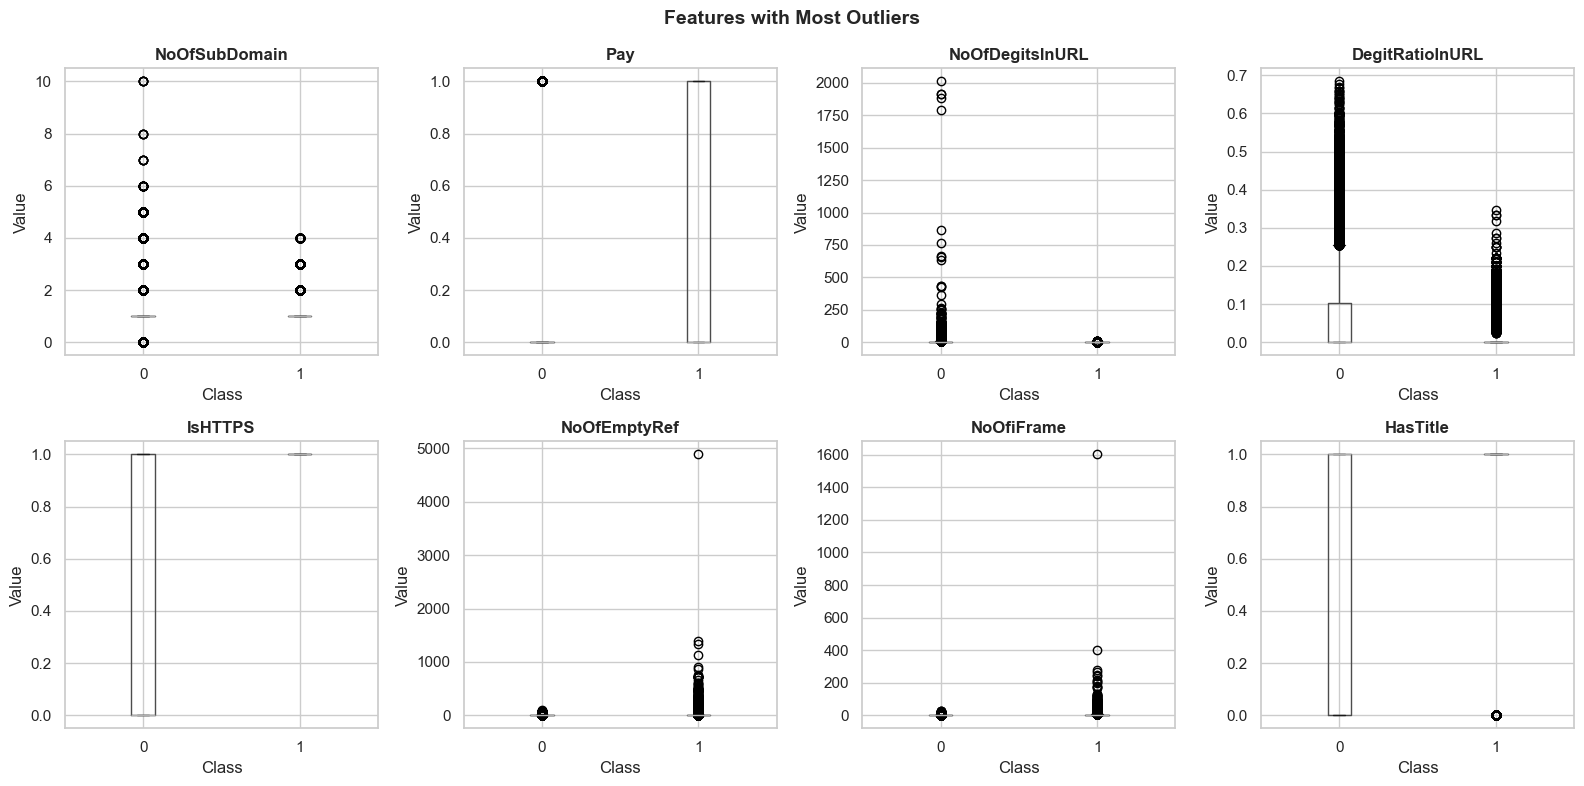

In [177]:
# Top outlier visualized
top_outlier_features = outlier_df.head(8)['Feature'].tolist()

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_outlier_features):
    ax = axes[idx]
    df.boxplot(column=feature, by='label', ax=ax)
    ax.set_title(feature, fontweight='bold')
    ax.set_xlabel('Class')
    ax.set_ylabel('Value')

plt.suptitle('Features with Most Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Many outliers appear to be discriminative signals. For example, extreme values in NoOfDegitsInURL and NoOfEmptyRef appear predominantly in phishing URLs

NoOfSubDomain
Both classes concentrated at 1; phishing has more extreme values

Pay
Appears to not be true outliers, just class imbalance

NoOfDegitsInURL
Phishing URLs show extreme digit counts

DegitRatioInURL
Phishing has wider spread; legitimate tightly clustered near 0

IsHTTPS
Legitimate = 1; Phishing split between 0 and 1

NoOfEmptyRef
Extreme outliers in phishing class (5000+)

NoOfiFrame
Legitimate sites occasionally have 1000+ iframes; phishing sites have few to none

HasTitle
Legitimate nearly always has title; phishing sometimes lacks it

Removing outliers could hurt model performance

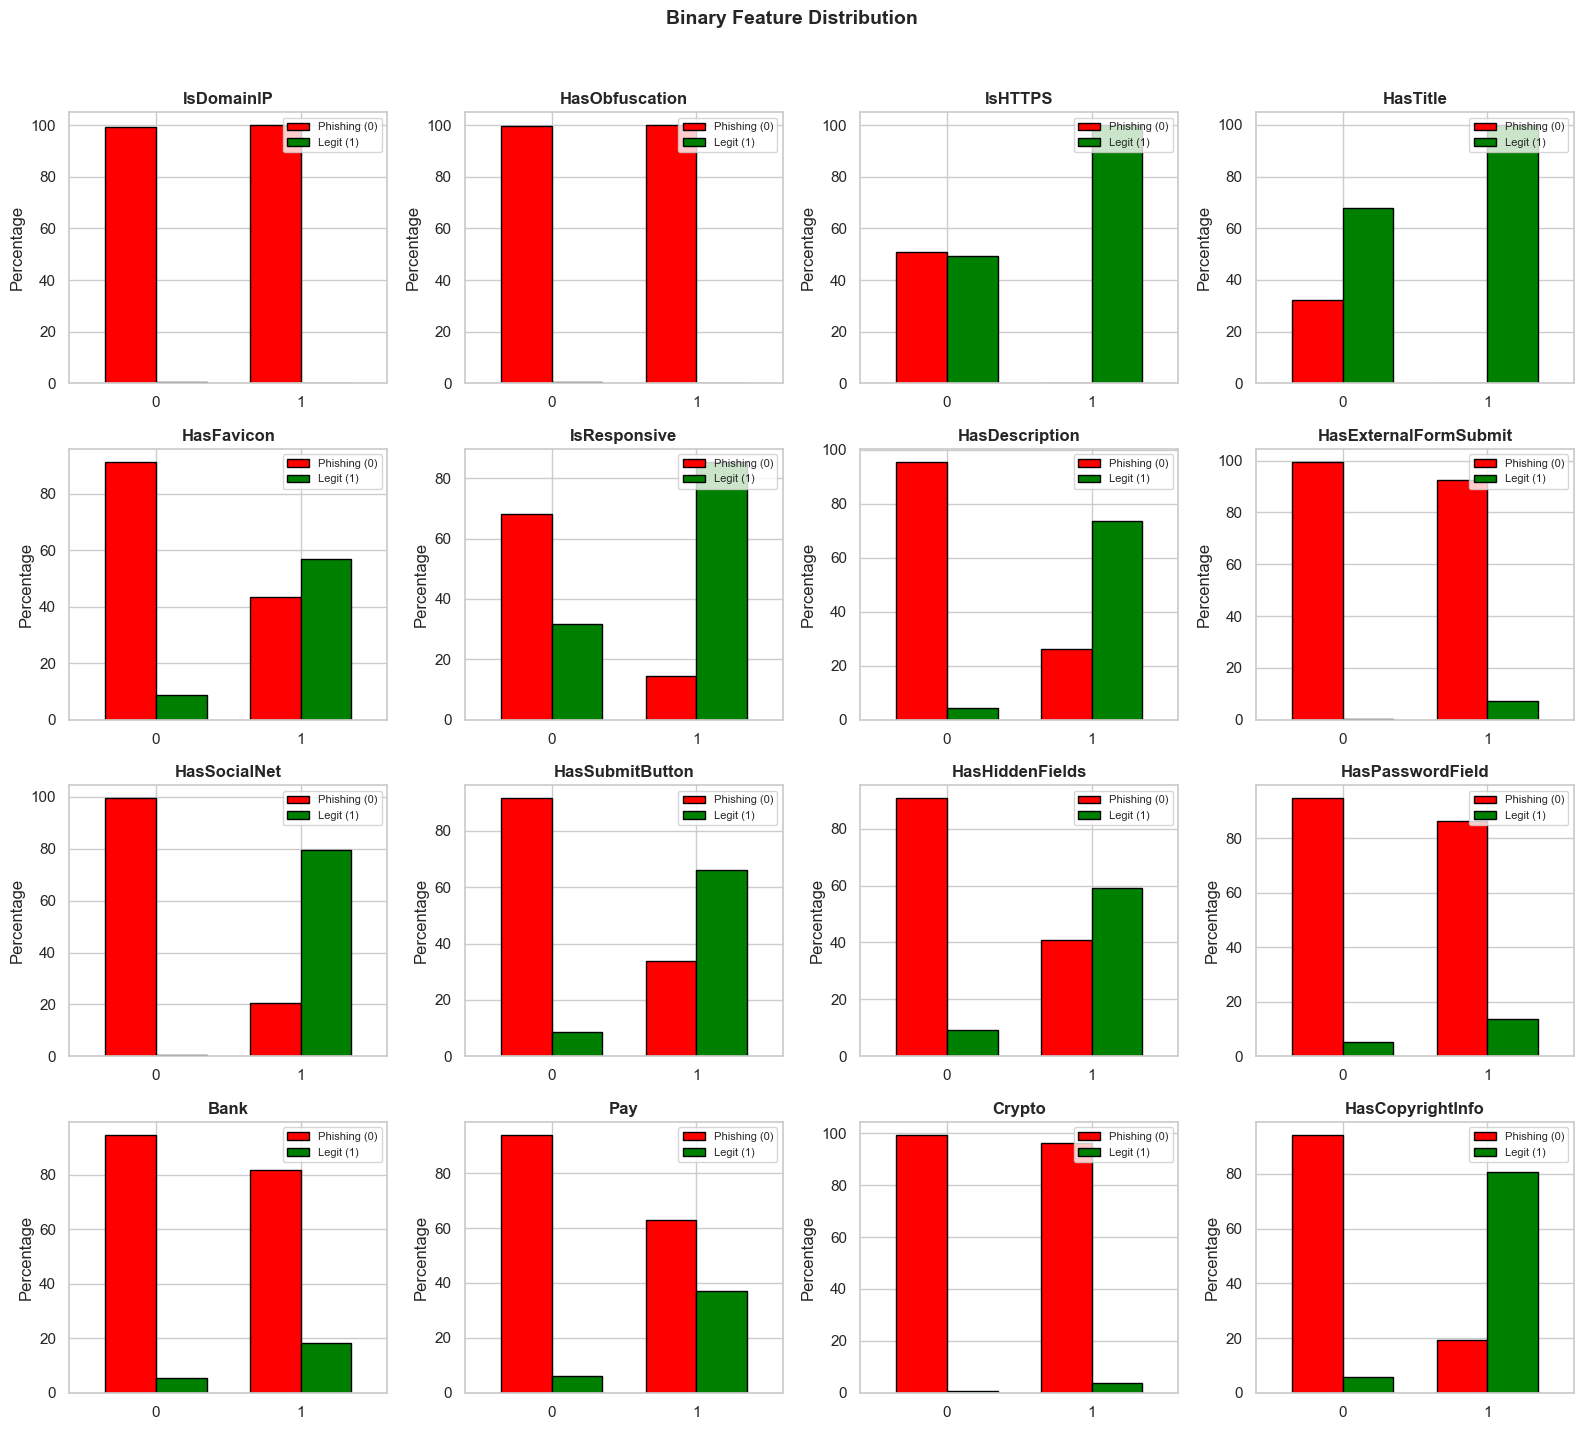

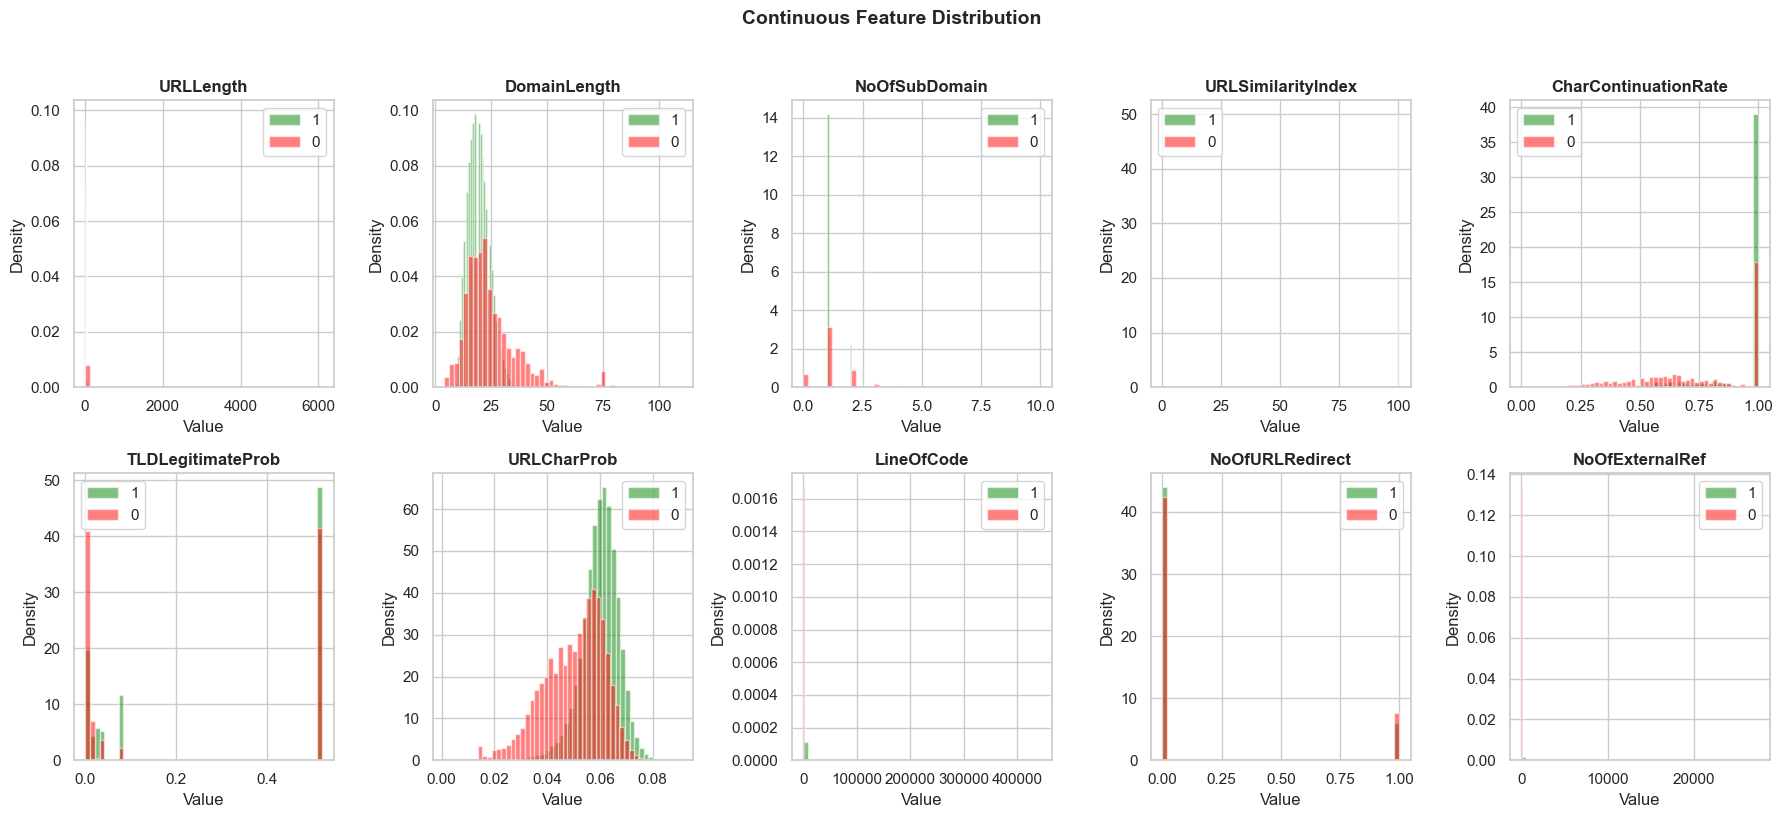

In [179]:
#Quick Charts to see data  Phishing vs. Legitimate

# Binary features
binary_features = ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 
                   'HasFavicon', 'IsResponsive', 'HasDescription',
                   'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
                   'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 
                   'Crypto', 'HasCopyrightInfo']

binary_features = [f for f in binary_features if f in df.columns]

# Binary features by class
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, feature in enumerate(binary_features):
    if idx < len(axes):
        ax = axes[idx]
        
        # Proportions by class
        cross_tab = pd.crosstab(df['label'], df[feature], normalize='index') * 100
        
        cross_tab.plot(kind='bar', ax=ax, color=['Red', 'Green'], 
                      edgecolor='black', width=0.7)
        ax.set_title(feature, fontweight='bold')
        ax.set_ylabel('Percentage')
        ax.set_xlabel('')
        ax.legend(['Phishing (0)', 'Legit (1)'], loc='upper right', fontsize=8)
        ax.tick_params(axis='x', rotation=0)

# Hide empty plots
for idx in range(len(binary_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Binary Feature Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Numerical features
continuous_features = ['URLLength', 'DomainLength', 'NoOfSubDomain', 
                       'URLSimilarityIndex', 'CharContinuationRate',
                       'TLDLegitimateProb', 'URLCharProb', 'LineOfCode',
                       'NoOfURLRedirect', 'NoOfExternalRef']

continuous_features = [f for f in continuous_features if f in df.columns]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    ax = axes[idx]
    
    # Plot by class
    for label, color in zip(df['label'].unique(), ['Green', 'Red']):
        subset = df[df['label'] == label][feature].dropna()
        ax.hist(subset, bins=50, alpha=0.5, label=label, color=color, density=True)
    
    ax.set_title(feature, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Continuous Feature Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [180]:
#Summary Stats on Important Features

impfea = [
    "IsHTTPS",
    "HasDescription",
    "HasSocialNet",
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

impfea = [c for c in impfea if c in df.columns]

summary_rows = []

for col in impfea:
    desc = df_dedup[col].describe()
    col_min = desc["min"]
    col_q1 = desc["25%"]
    col_median = desc["50%"]
    col_mean = desc["mean"]
    col_q3 = desc["75%"]
    col_max = desc["max"]
    col_std = desc["std"]
    col_count = desc["count"]

    col_var = df_dedup[col].var()
    mode_series = df_dedup[col].mode()
    col_mode = mode_series.iloc[0] if not mode_series.empty else None
    col_range = col_max - col_min

    summary_rows.append({
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_df = pd.DataFrame(summary_rows).set_index("feature")
print(summary_df)

for cls, subdf in df.groupby("label"):
    for col in impfea:
        desc = subdf[col].describe()
        col_min = desc["min"]
        col_q1 = desc["25%"]
        col_median = desc["50%"]
        col_mean = desc["mean"]
        col_q3 = desc["75%"]
        col_max = desc["max"]
        col_std = desc["std"]
        col_count = desc["count"]
        
        col_var = subdf[col].var()
        mode_series = subdf[col].mode()
        col_mode = mode_series.iloc[0] if not mode_series.empty else None
        col_range = col_max - col_min

        summary_rows.append({
        "label": cls,
        "feature": col,
        "count": col_count,
        "min": col_min,
        "q1": col_q1,
        "median": col_median,
        "mean": col_mean,
        "q3": col_q3,
        "max": col_max,
        "range": col_range,
        "std": col_std,
        "var": col_var,
        "mode": col_mode,
    })

summary_by_label = pd.DataFrame(summary_rows).set_index(["feature", "label"])
print(summary_by_label)

                         count   min     q1  median         mean      q3  \
feature                                                                    
IsHTTPS               235370.0   0.0   1.00     1.0     0.782717     1.0   
HasDescription        235370.0   0.0   0.00     0.0     0.440855     1.0   
HasSocialNet          235370.0   0.0   0.00     0.0     0.457395     1.0   
URLLength             235370.0  13.0  23.00    27.0    34.545516    34.0   
NoOfObfuscatedChar    235370.0   0.0   0.00     0.0     0.024880     0.0   
LineOfCode            235370.0   2.0  18.00   431.0  1143.790602  1279.0   
NoOfExternalRef       235370.0   0.0   1.00    10.0    49.348936    58.0   
CharContinuationRate  235370.0   0.0   0.68     1.0     0.845900     1.0   

                           max     range          std           var  mode  
feature                                                                    
IsHTTPS                    1.0       1.0     0.412398  1.700721e-01   1.0  
HasDescript

#Visualizaton of Important features <May duplicate some earlier plots>

IsHTTPS
- This is bar chart that measures two features. The target feature (label) and whether or not the site uitilizes HTTPS. The plot suggests that legitimate websites only use HTTPS, while phishing sites are unsecure and use HTTP.
  
HasDescription
- This is bar chart that measures two features. The target feature (label) and whether or not the site has a description. The plot indicates that legitimate pages tend to have descriptions of their page in their HTML, while phishing website hardly ever have them.
  
HasSocialNet
- This is bar chart that measures two features. The target feature (label) and whether or not the site has a link to social media site. The plot indicates that phishing sites do not have links to webpages and legitimate site tend to have links to social media. 

URLength 
- This is a violin plot to view 2 distribution next to each other sepereated by the label class. You are able to see that most of the legitimate URLs have roughly the same URL length while phishing links have a much wider spread. 

NoOfObfuscatedChar 
-This is a violin plot to view 2 distribution next to each other sepereated by the label class. From the two distributions, you are able to see that Legitimate websites do not use Obfuscated characters and Phishing sites have a much wider distribution.

LineOfCode
-This is a violin plot to view 2 distribution next to each other sepereated by the label class. We are able to see that most legitimate sites have a very flat distribution with most of the sites having more than 100 lines of code. Inversely, majority of the phishing sites are less than 100 lines of code. 

NoOfExternalRef
- Very similar to the LineofCode violin plot. 

CharContinuationRate
-This is a violin plot to view 2 distribution next to each other sepereated by the label class. Most legitimate sites have a rate that's closer to 1. Phishing sites are spread through out 0 through 1. 


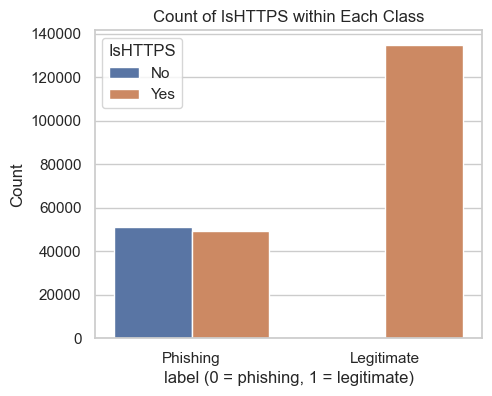

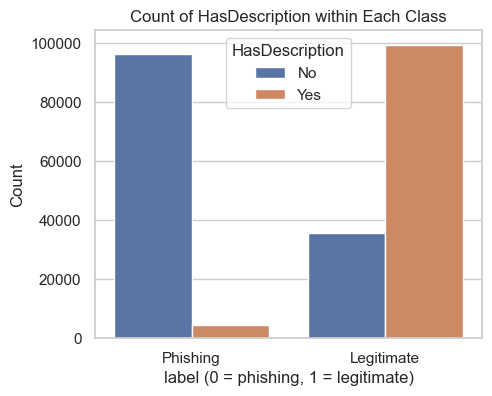

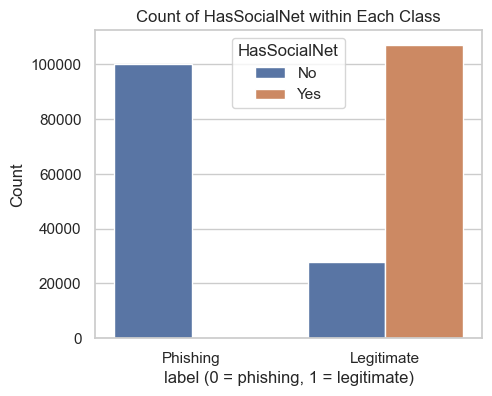

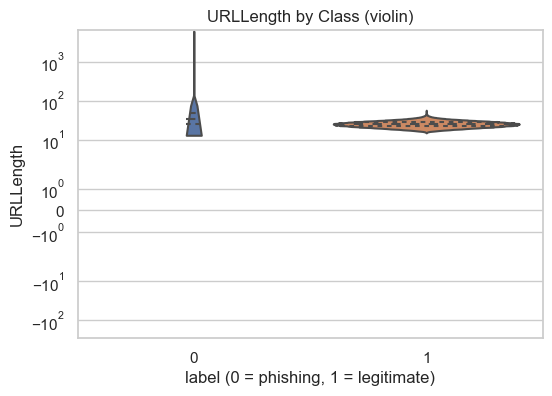

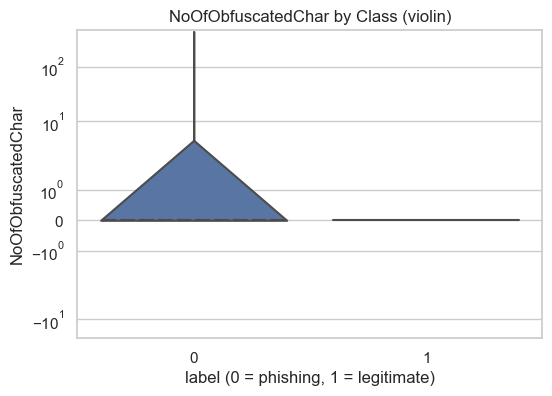

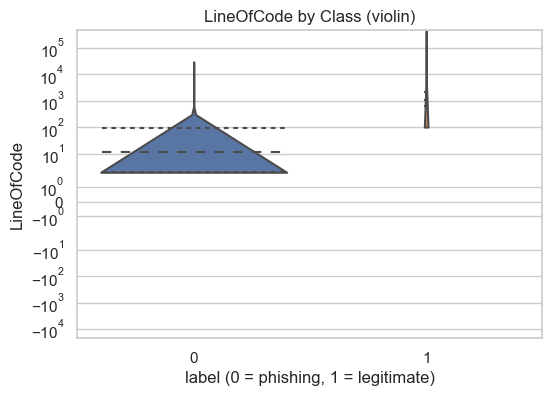

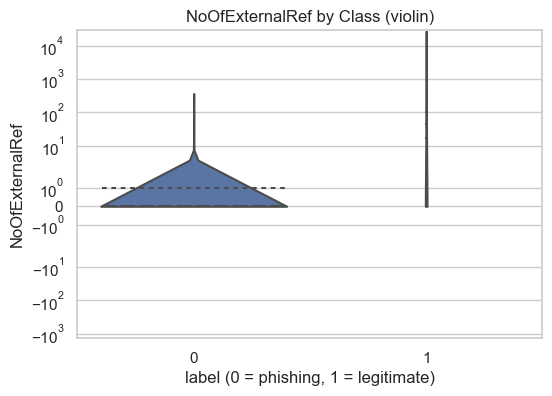

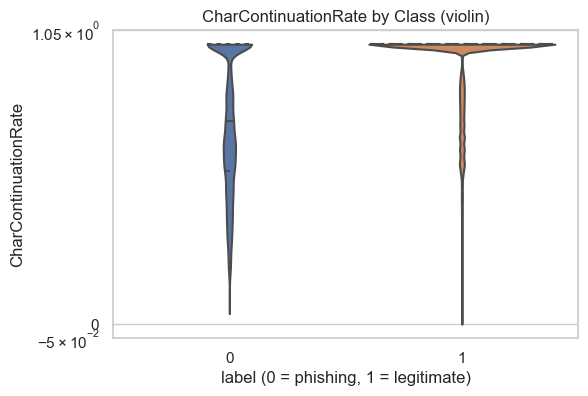

In [182]:
#Visualizations
##Binary
bin_cols = [c for c in ["IsHTTPS","HasDescription","HasSocialNet"] if c in df_dedup.columns]

for col in bin_cols:
    counts = (
        df_dedup
        .groupby(["label", col])
        .size()                  # raw counts
        .rename("count")
        .reset_index()
    )
    counts["label"] = counts["label"].map({0: "Phishing", 1: "Legitimate"})
    counts[col] = counts[col].map({0: "No", 1: "Yes"})
    
    plt.figure(figsize=(5, 4))
    sns.barplot(
        data=counts,
        x="label",
        y="count",
        hue=col
    )
    plt.title(f"Count of {col} within Each Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel("Count")
    plt.show()

##Numerical 
num_cols = [
    "URLLength",
    "NoOfObfuscatedChar",
    "LineOfCode",
    "NoOfExternalRef",
    "CharContinuationRate",
]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(
        data=df_dedup,
        x="label",
        y=col,
        cut=0,
        inner="quartile"
    )
    plt.title(f"{col} by Class (violin)")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.ylabel(col)
    plt.yscale("symlog")  # again, optional
    plt.show()

#Relationship between Attributes/Features
Exploration between attributes began with a CorrMap. Mapping out every the correlation between every value is hard to visually see, but we are able to filter out pairs that have low correlation with each other and determine which attributes have the strongest correlation with the label attribute. The pairs with the strongest correlation are then plotted and we are able to see interesting data such as URLTitleMatchScore and DomainTitleMatchScore suggesting there the legitimate websites tend to have higher URL and Domain Title Match Scores. We are also able to flesh out which features have the strongest correlation with Label, most of the features indicating that a legitimate website usually has more complexity to the site itself and that phishing sites have more complexity in the URL itself. We are also able to most of the URLs that had obfuscated characters were URLs that were longer AND phishing site. The larger a site (lines of code), less likely that the url had any obfuscated characters, supporting the claim that phishing websites have their complexities on their URL rather than the website itself. Alot of the data when plotted as a strip plot didnt do much to as directly classifying what is phishing site, but the opposite (what makes a legitimate site). There was no instances of any phsihing site that used HTTPS or legitimate sites had ALOT more lines of codes than their counter parts. 

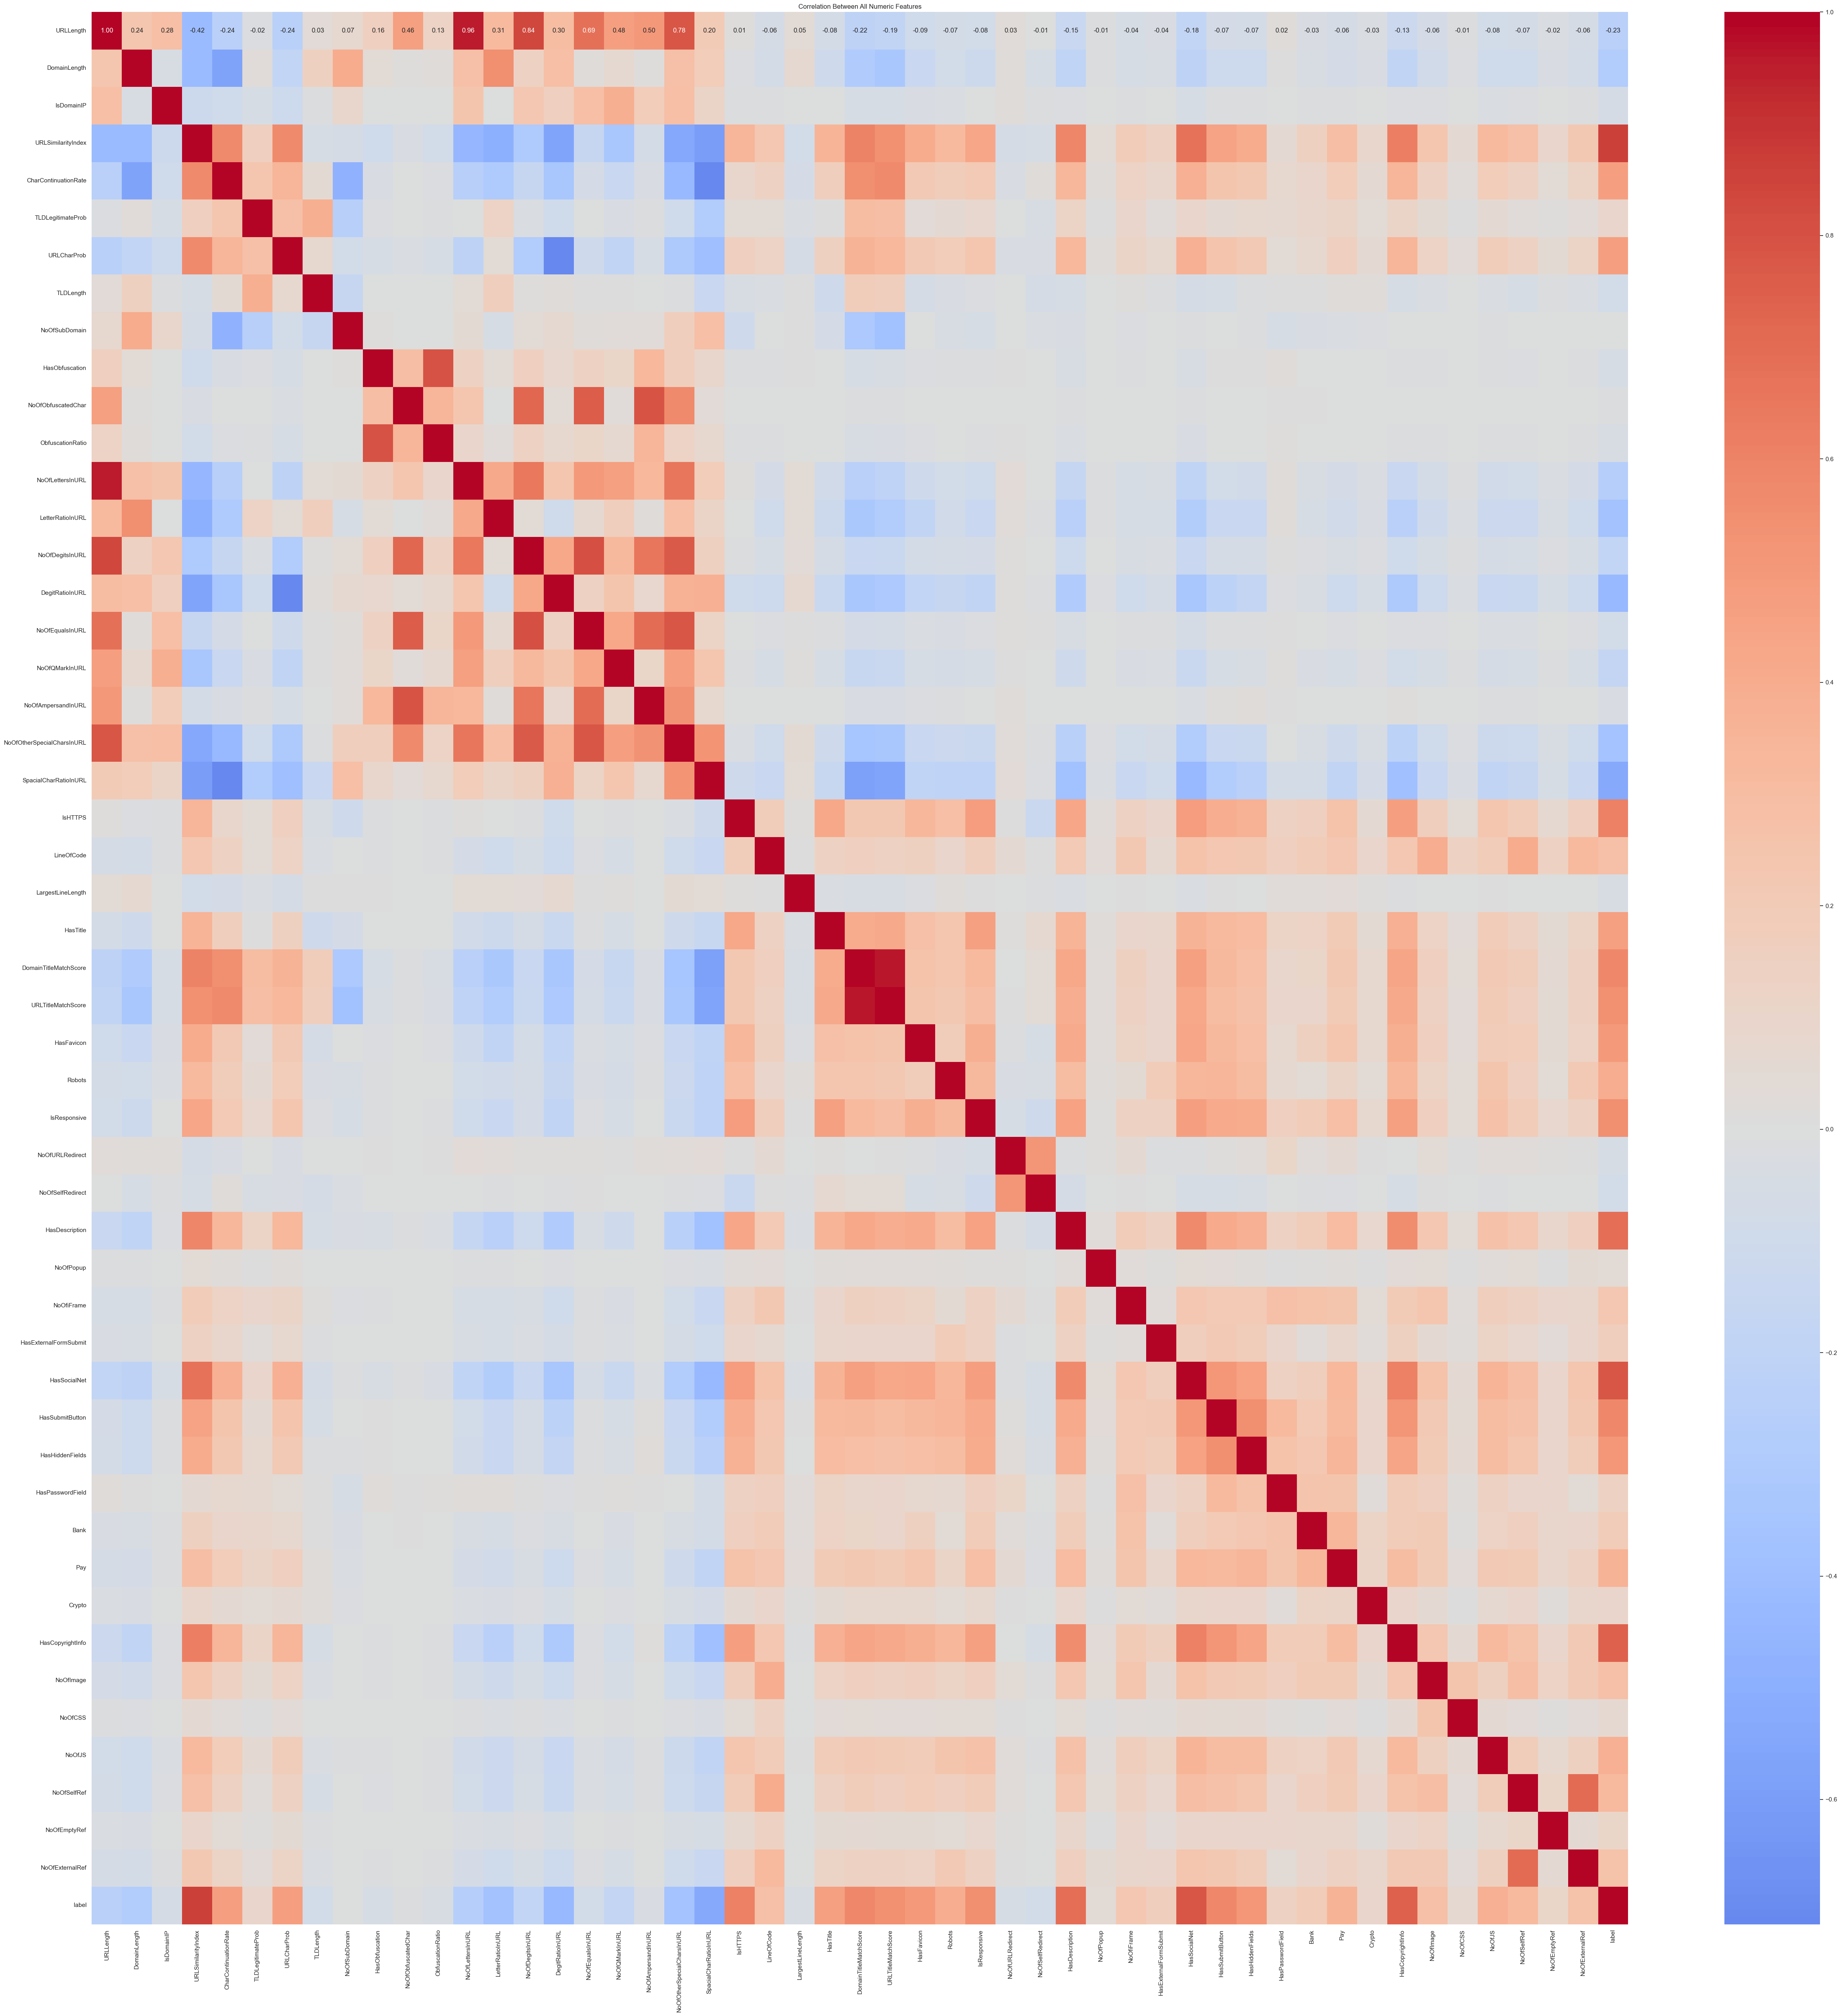

                  feature_1              feature_2      corr  abs_corr
1250  DomainTitleMatchScore     URLTitleMatchScore  0.961166  0.961166
1299     URLTitleMatchScore  DomainTitleMatchScore  0.961166  0.961166
588        NoOfLettersInURL              URLLength  0.956046  0.956046
11                URLLength       NoOfLettersInURL  0.956046  0.956046
686         NoOfDegitsInURL              URLLength  0.835966  0.835966
13                URLLength        NoOfDegitsInURL  0.835966  0.835966
701         NoOfDegitsInURL        NoOfEqualsInURL  0.806379  0.806379
798         NoOfEqualsInURL        NoOfDegitsInURL  0.806379  0.806379
451          HasObfuscation       ObfuscationRatio  0.798787  0.798787
548        ObfuscationRatio         HasObfuscation  0.798787  0.798787
URLSimilarityIndex       0.860342
HasSocialNet             0.783882
HasCopyrightInfo         0.743197
HasDescription           0.690011
IsHTTPS                  0.610253
DomainTitleMatchScore    0.584204
HasSubmitButton

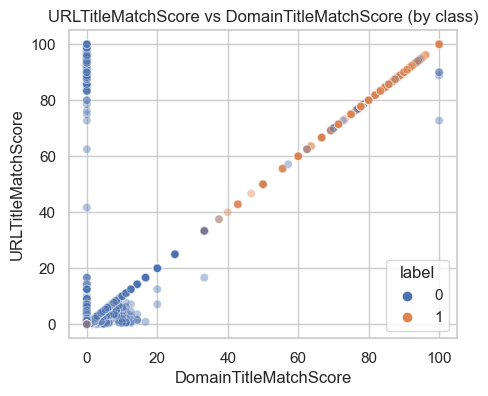

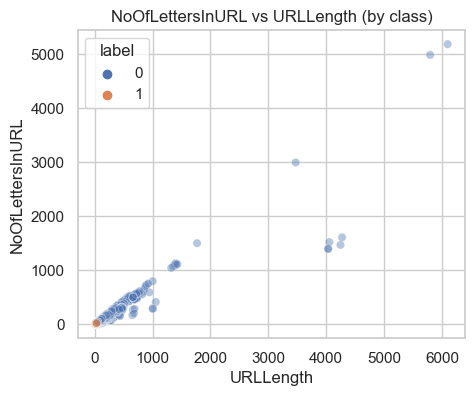

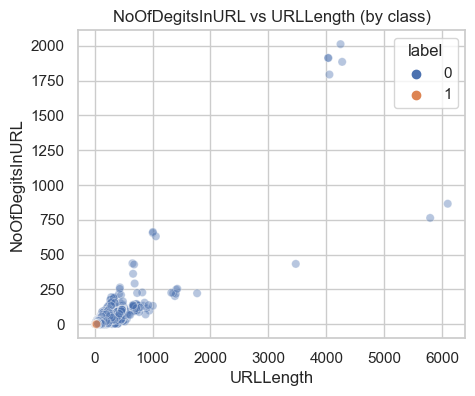

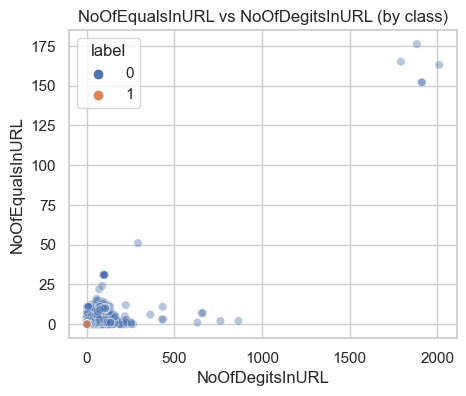

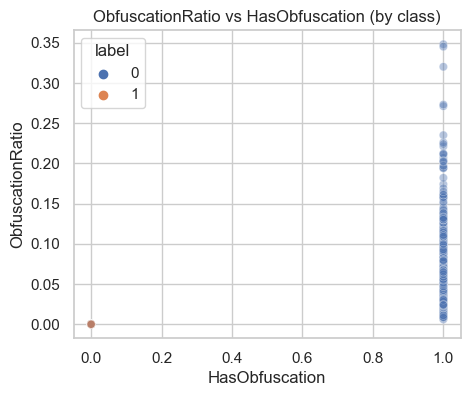

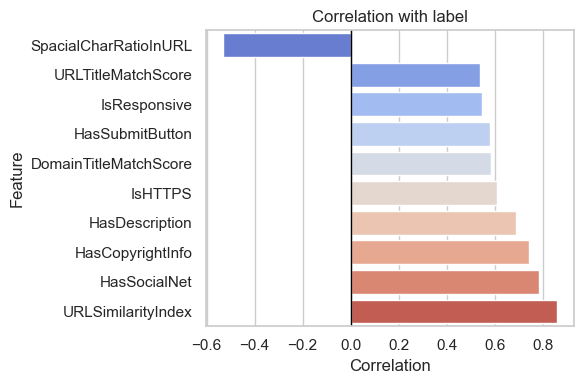

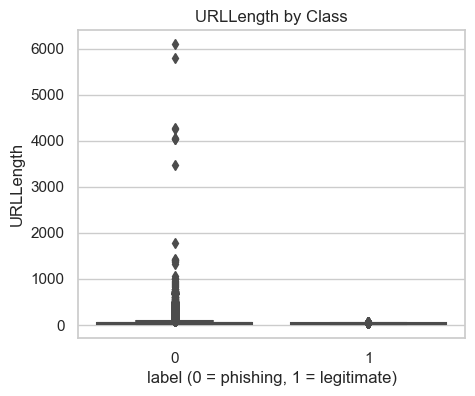

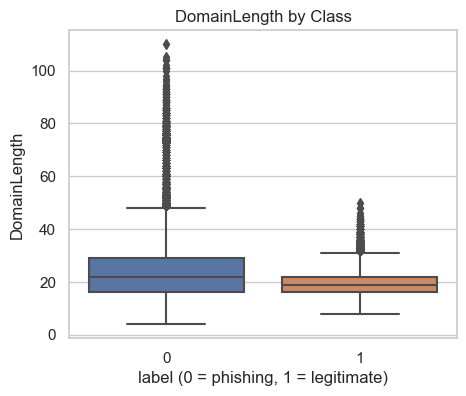

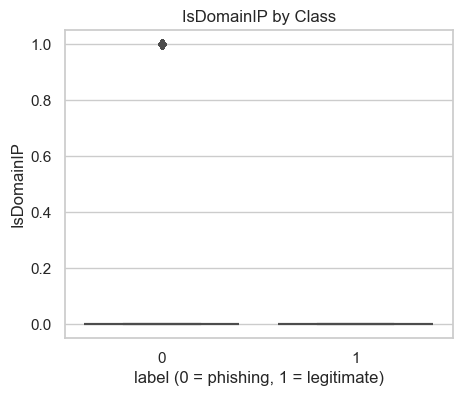

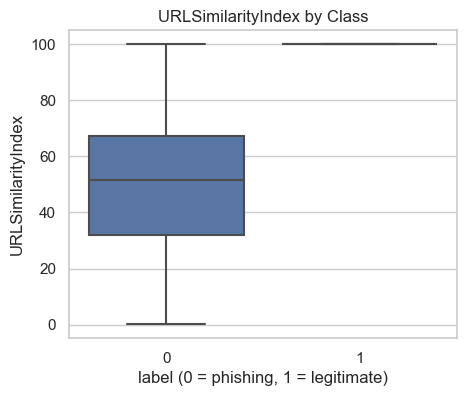

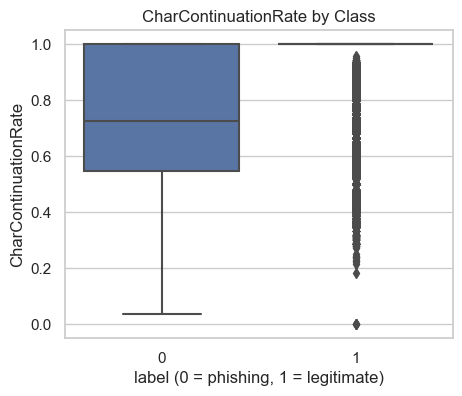

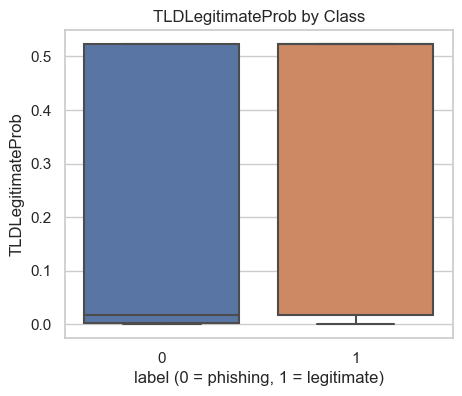

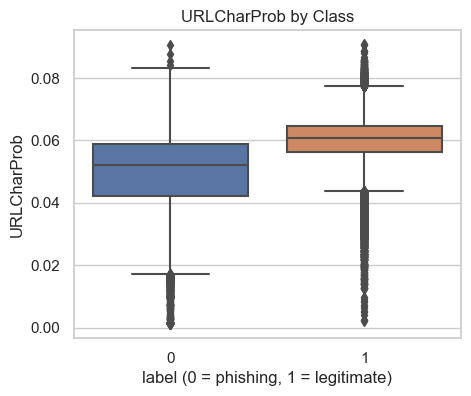

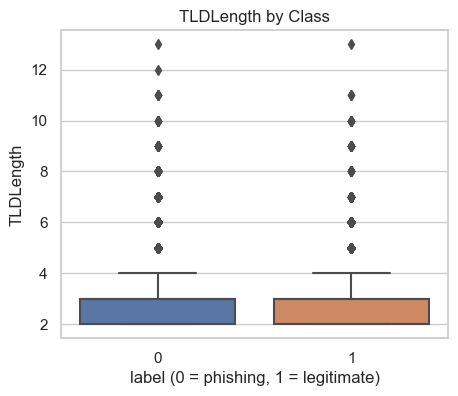

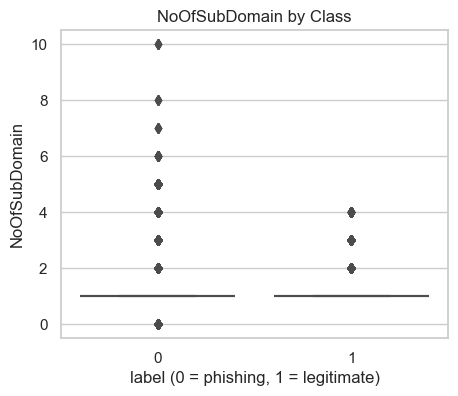

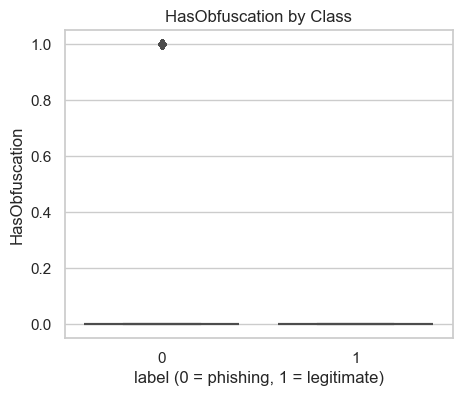

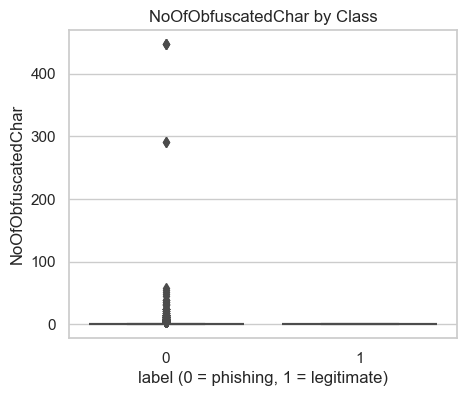

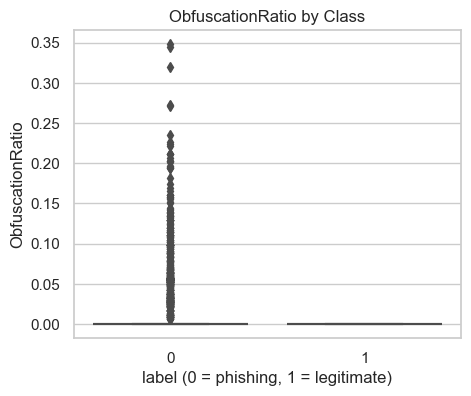

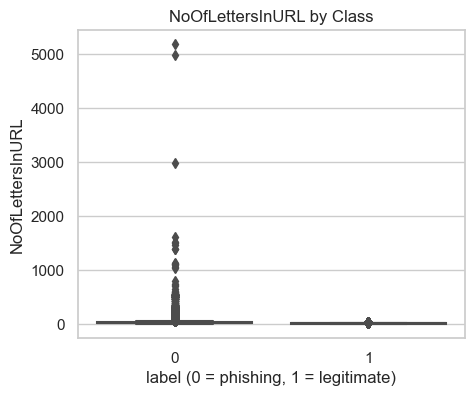

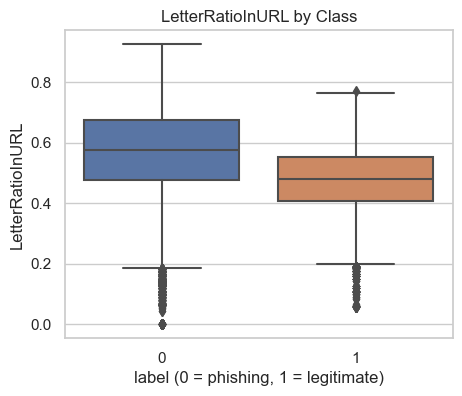

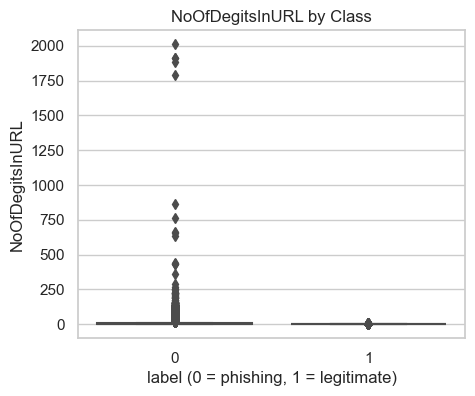

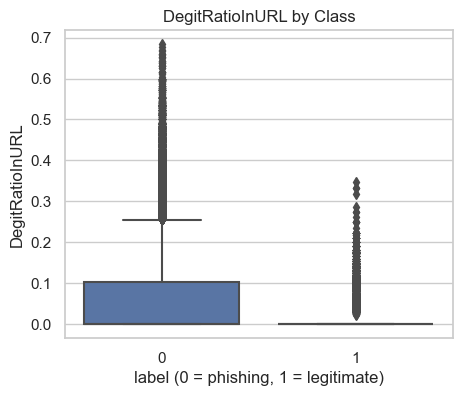

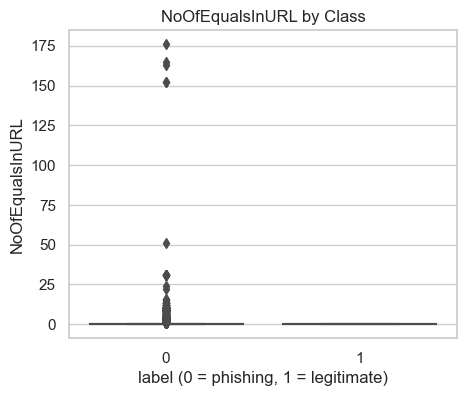

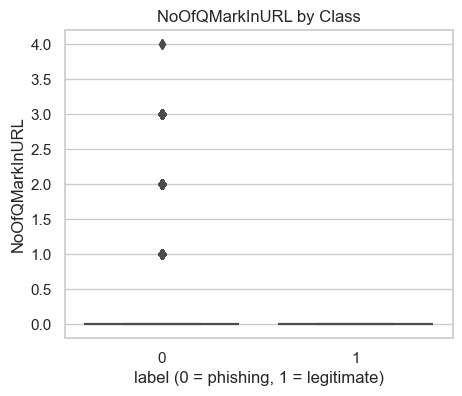

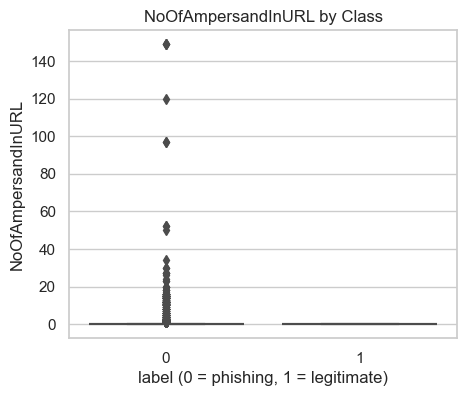

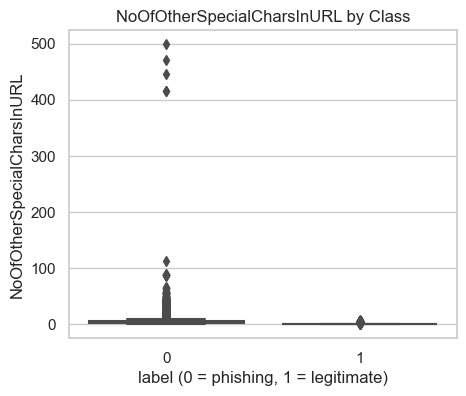

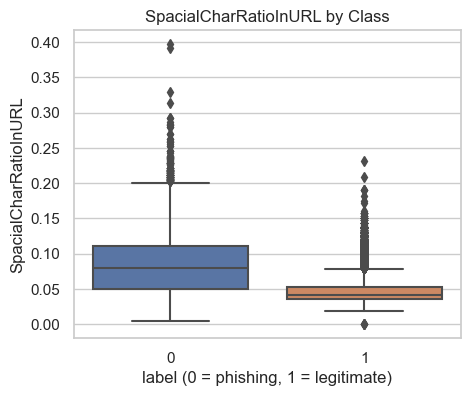

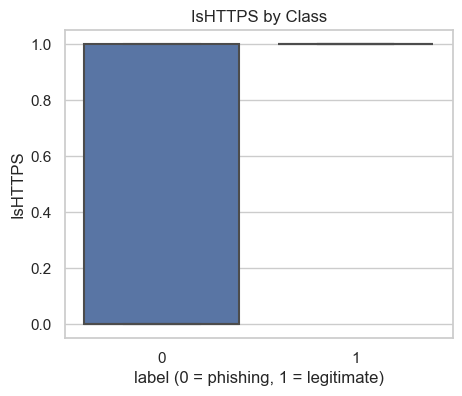

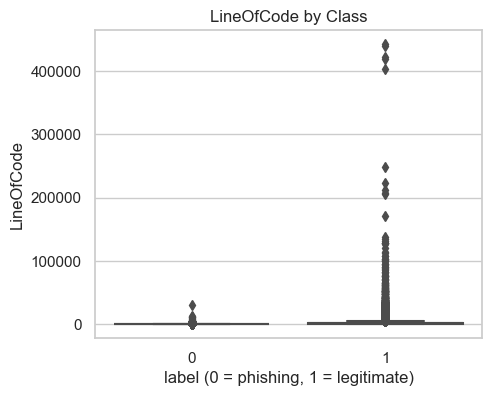

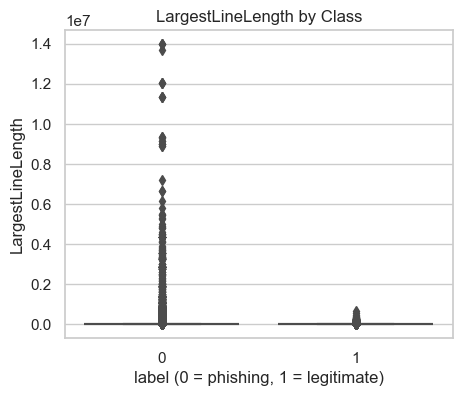

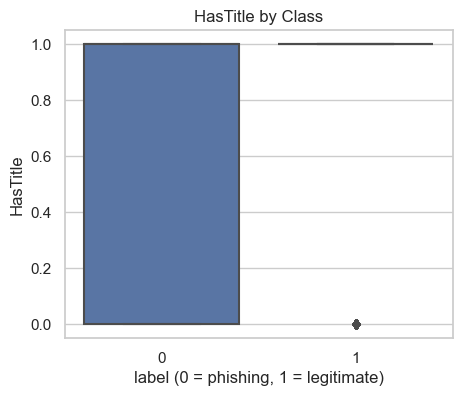

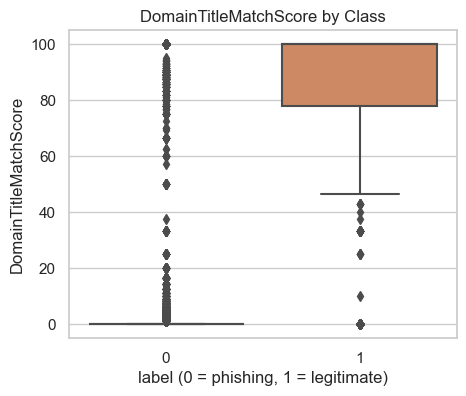

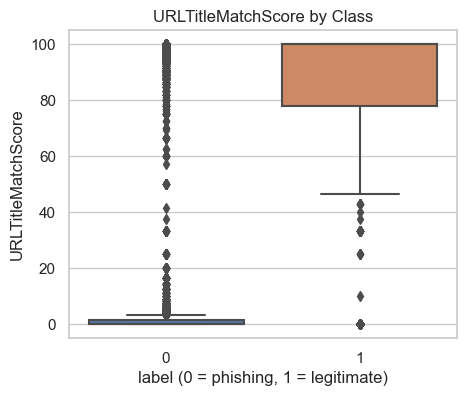

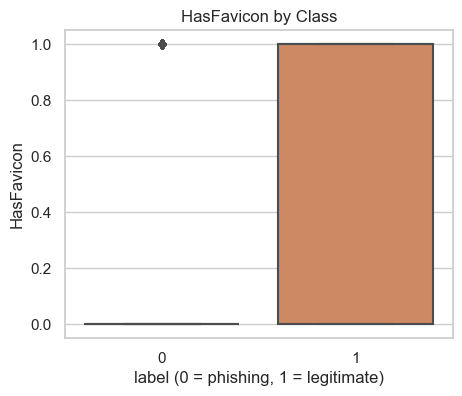

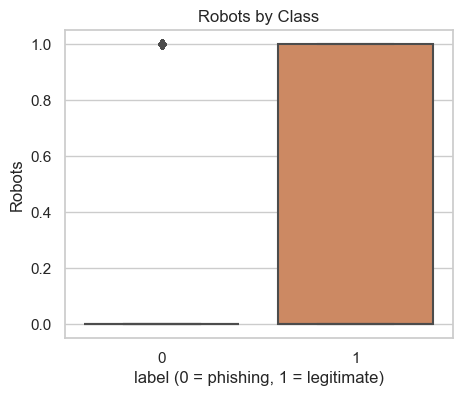

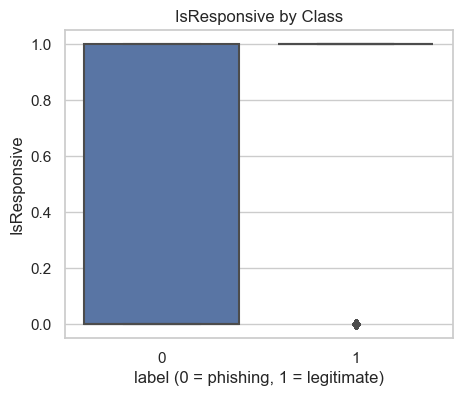

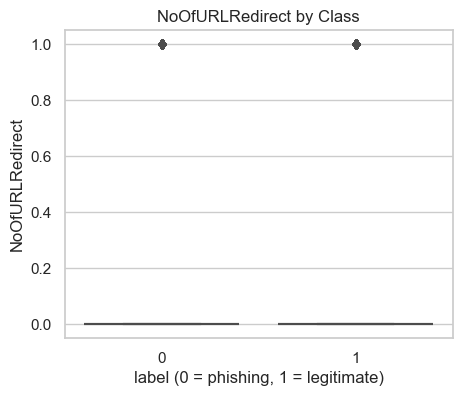

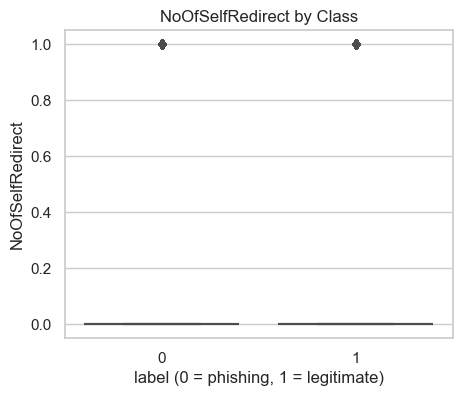

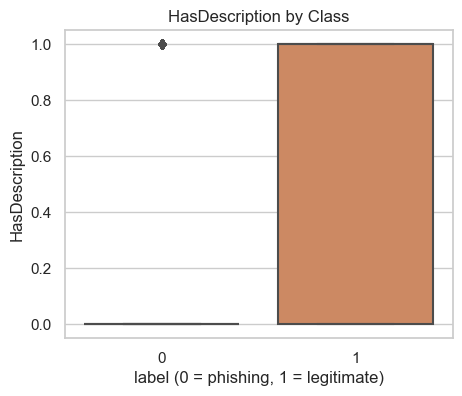

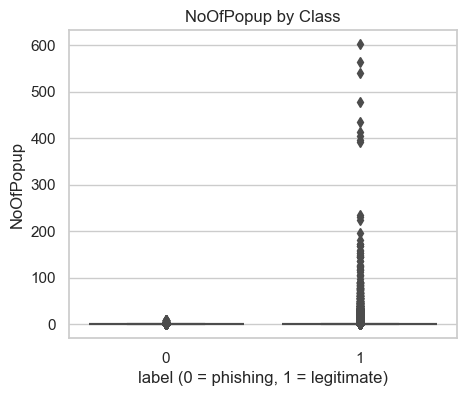

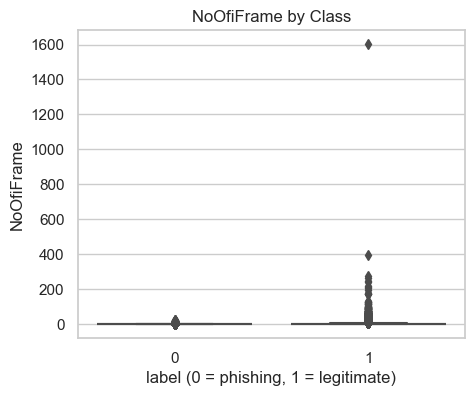

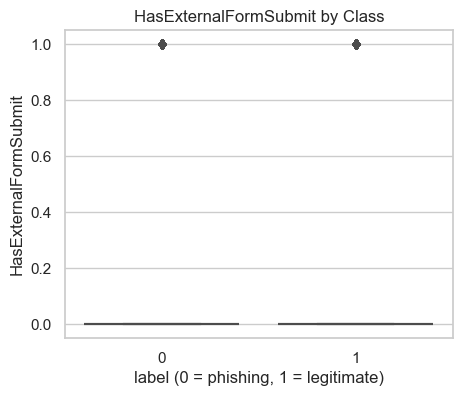

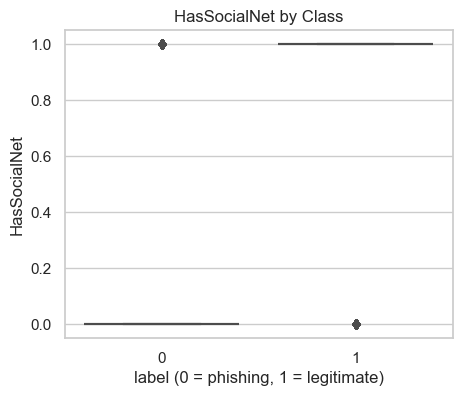

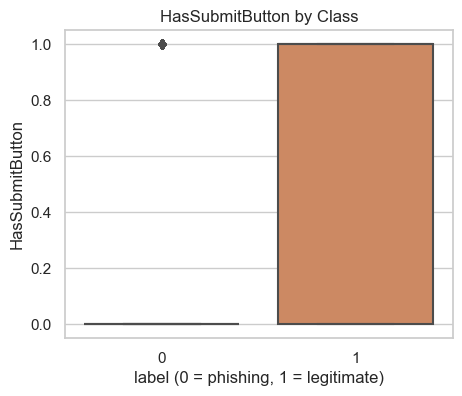

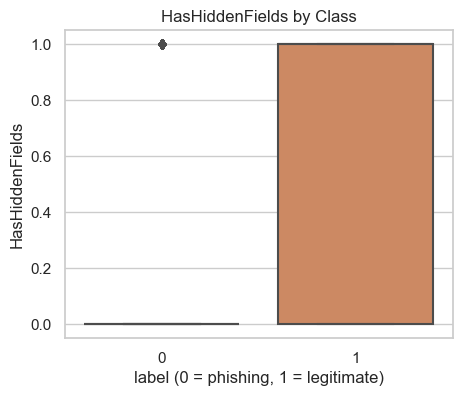

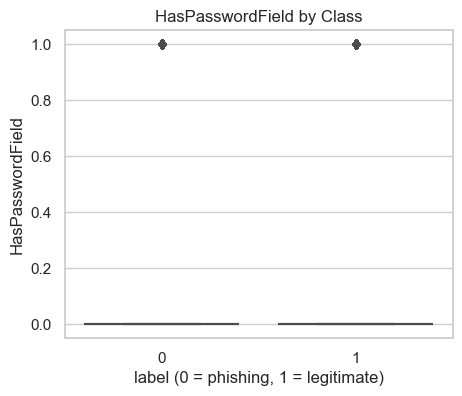

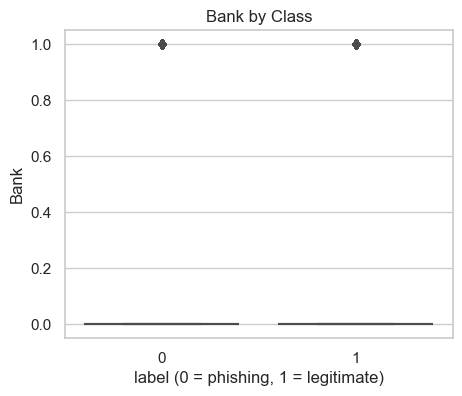

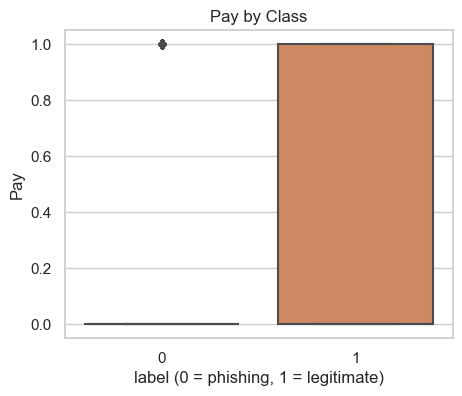

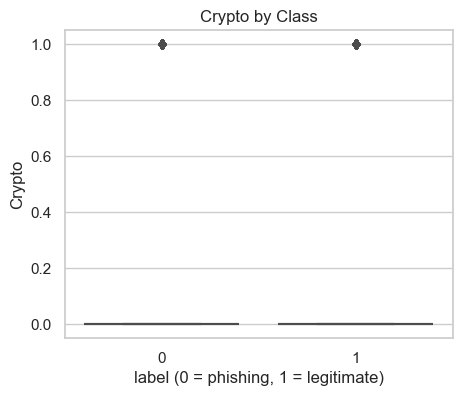

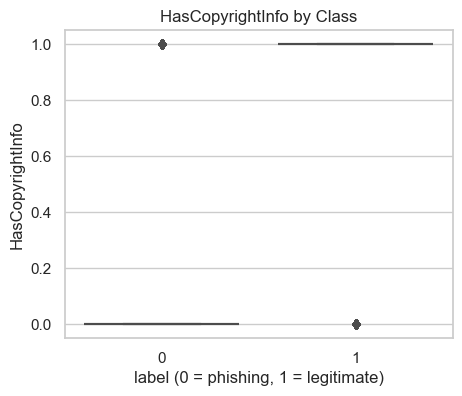

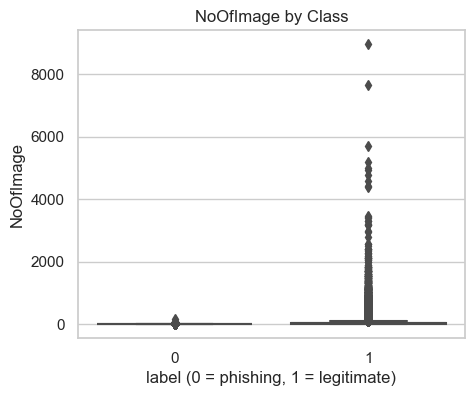

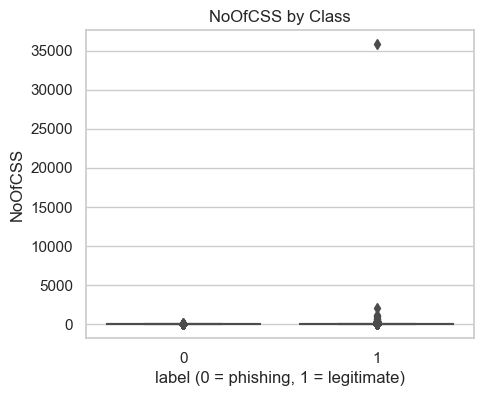

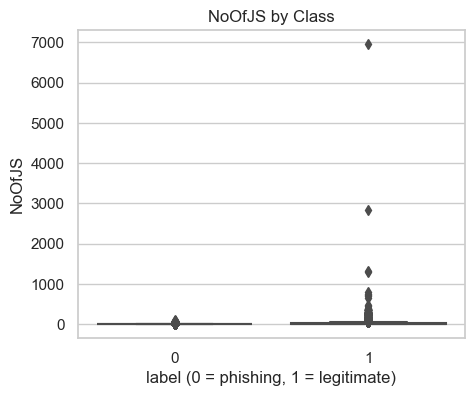

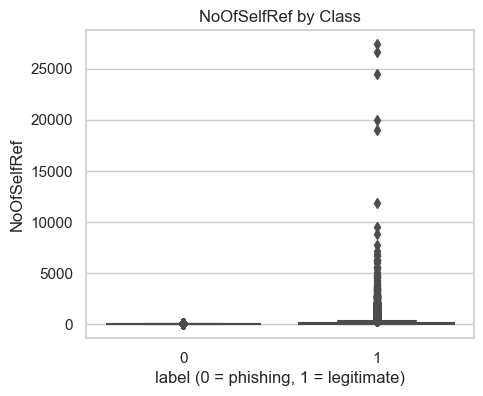

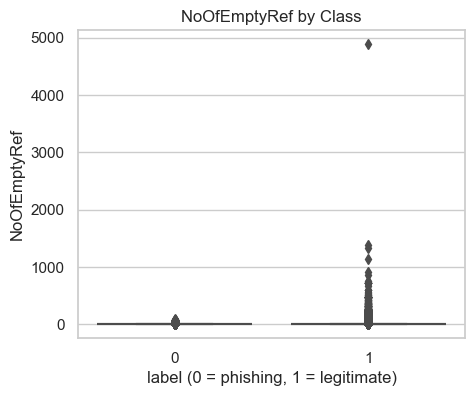

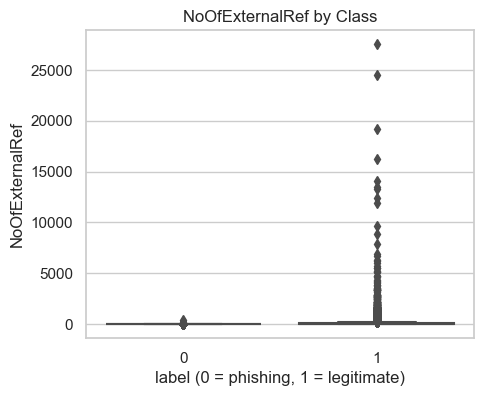

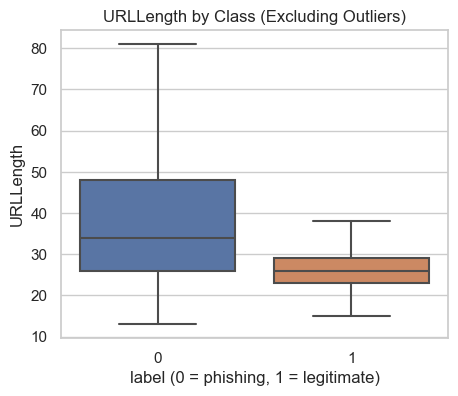

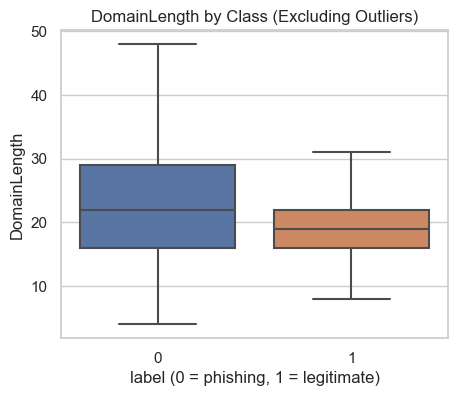

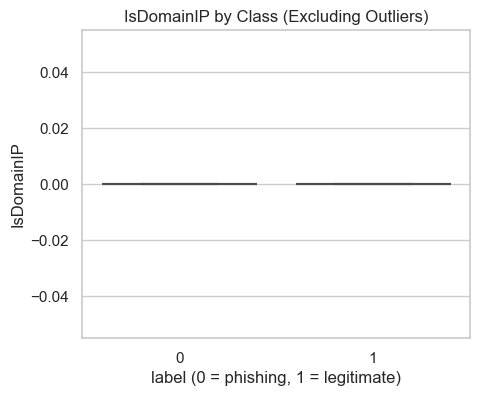

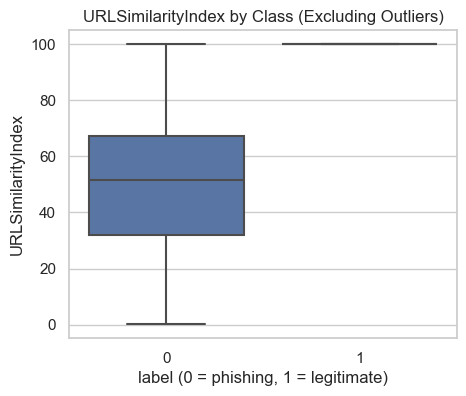

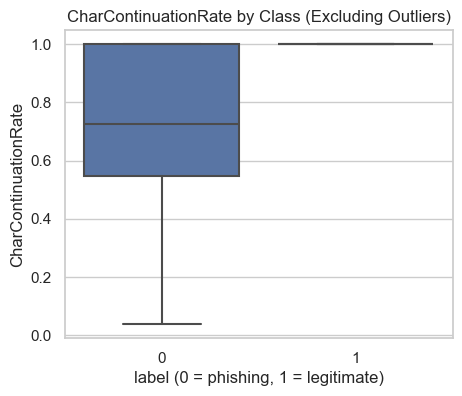

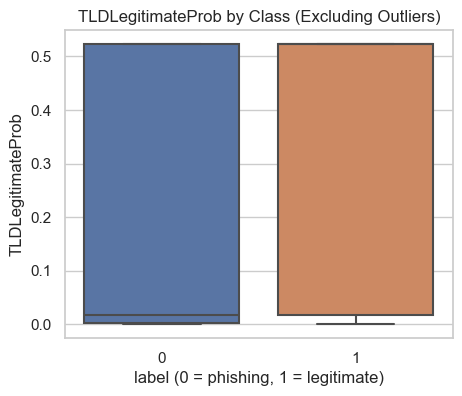

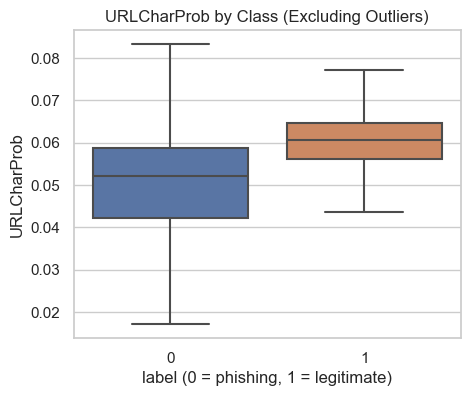

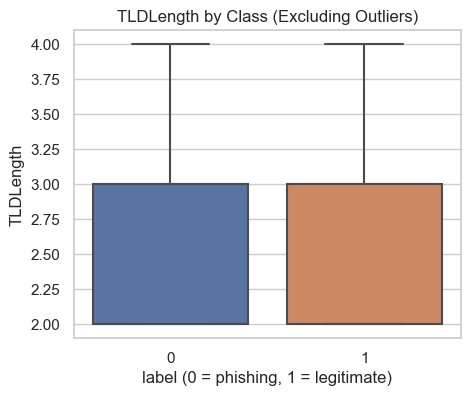

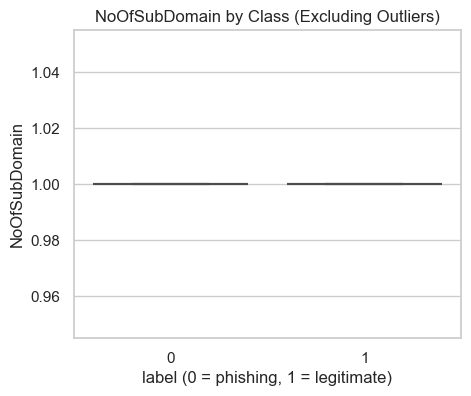

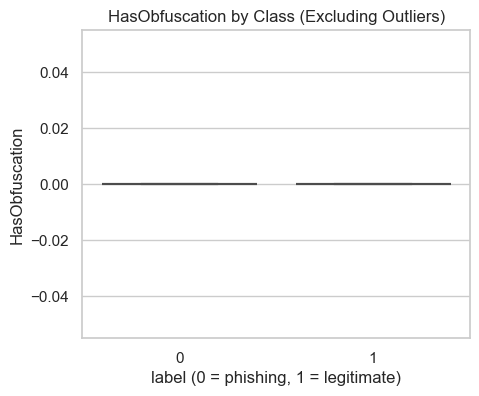

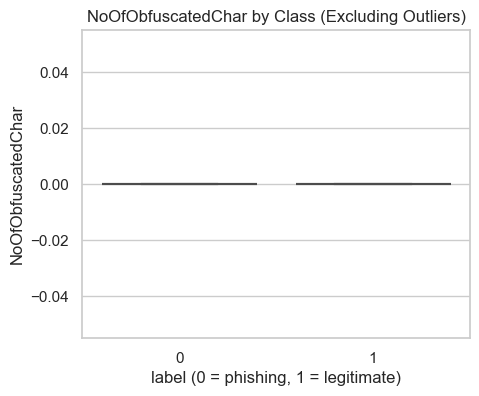

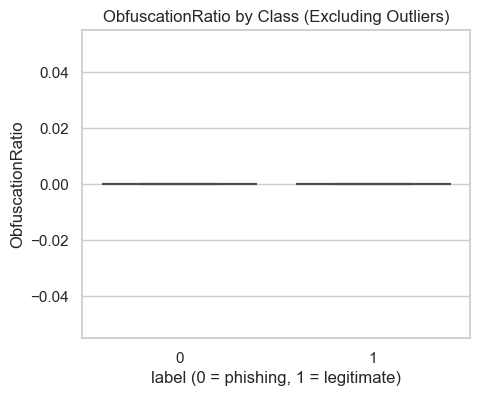

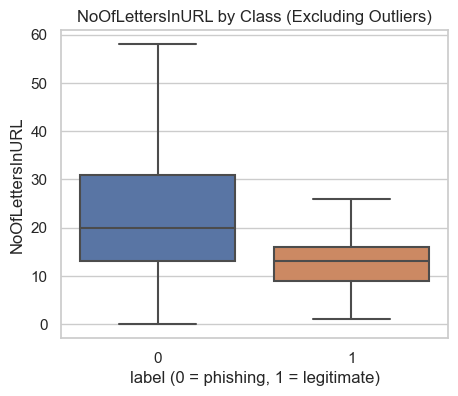

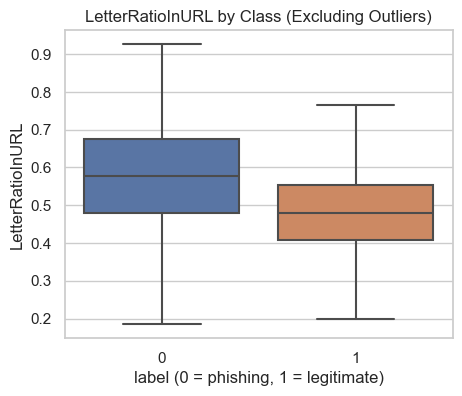

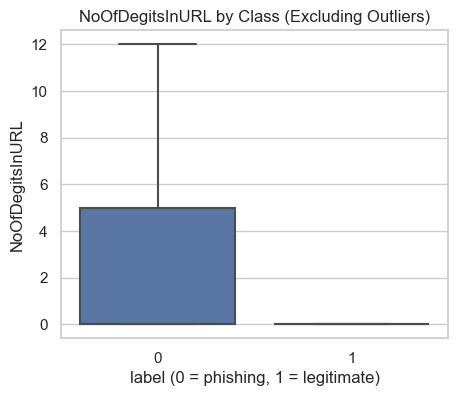

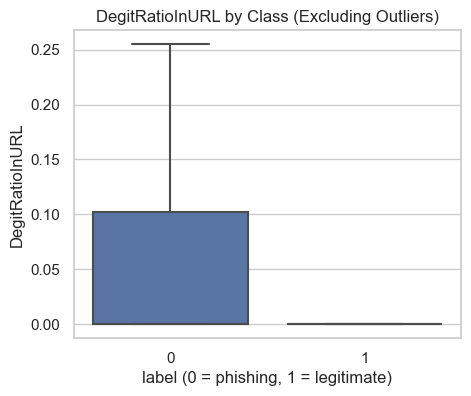

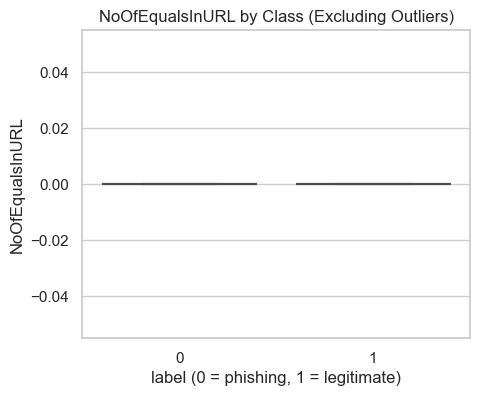

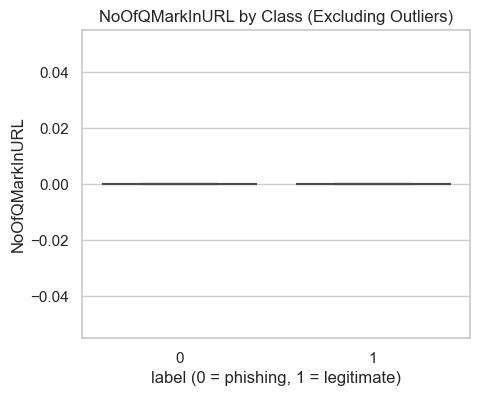

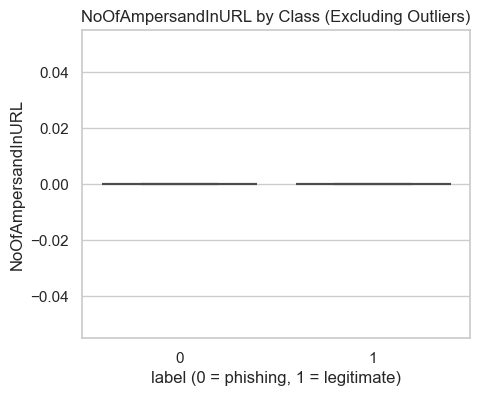

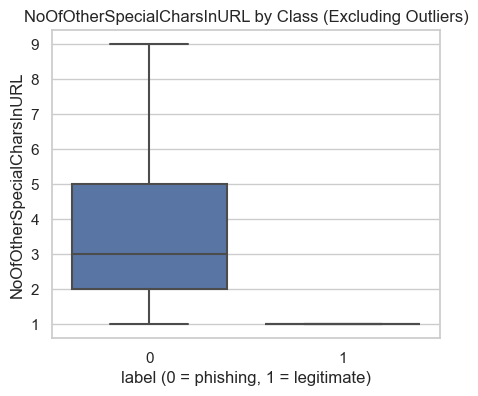

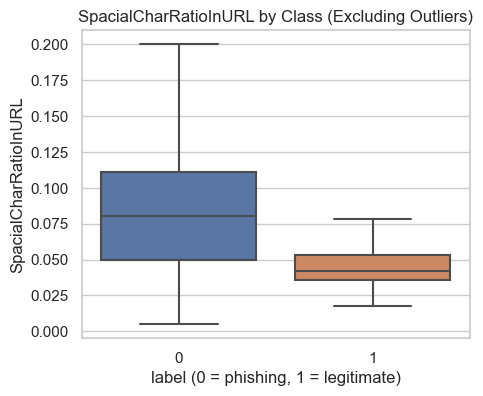

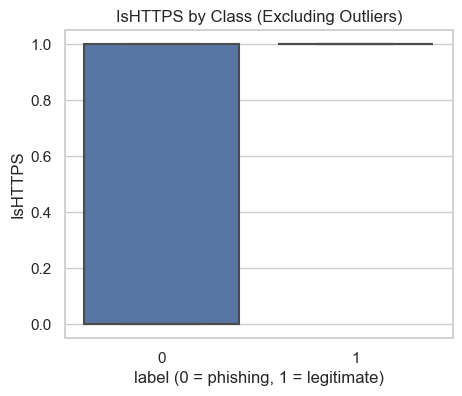

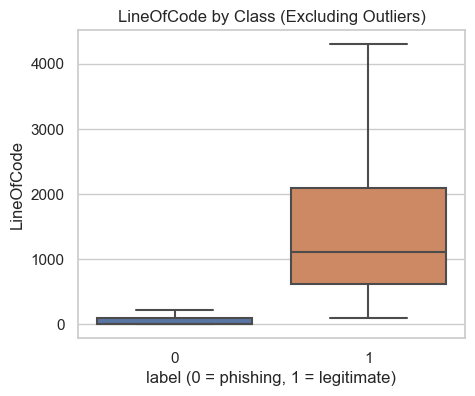

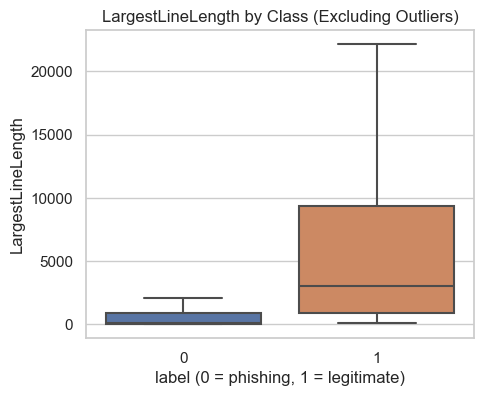

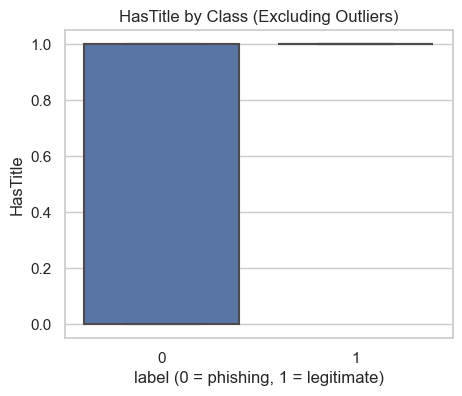

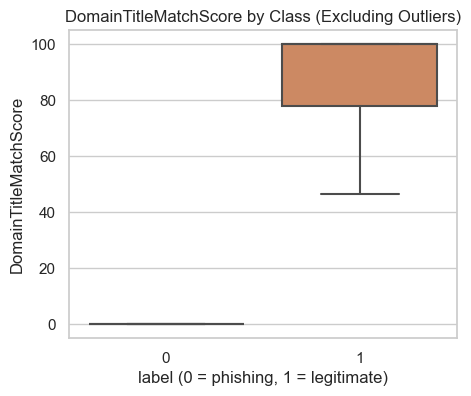

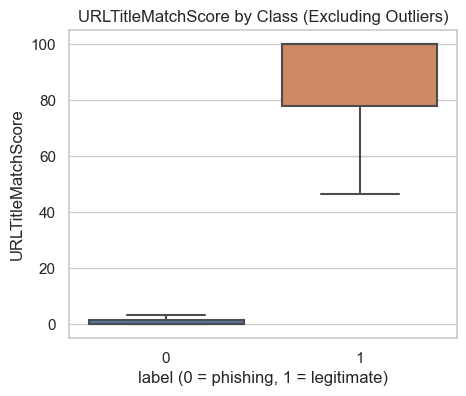

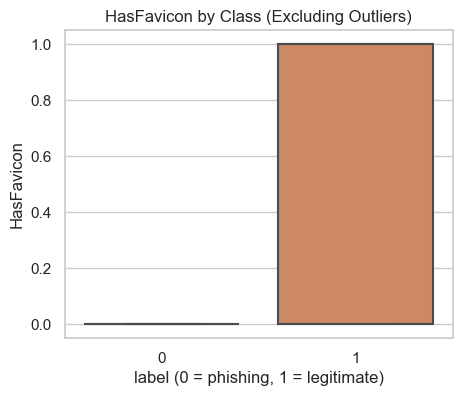

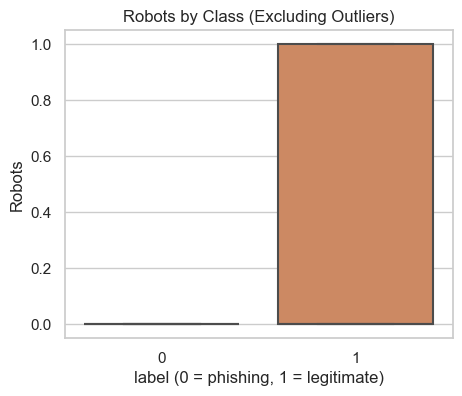

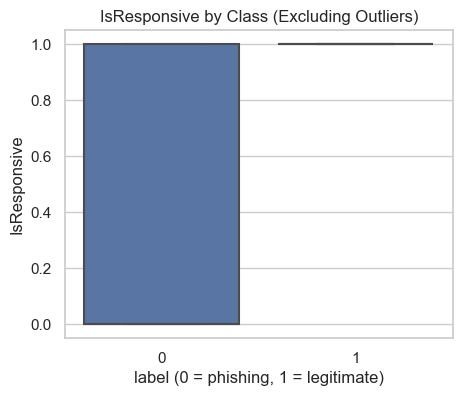

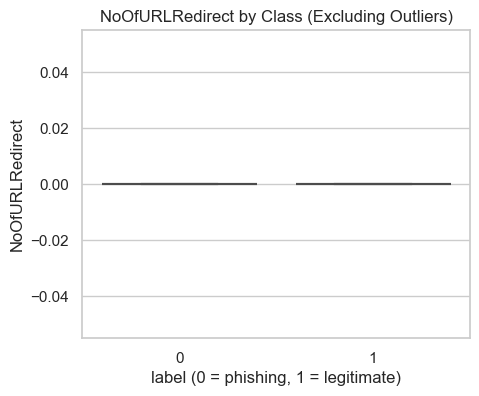

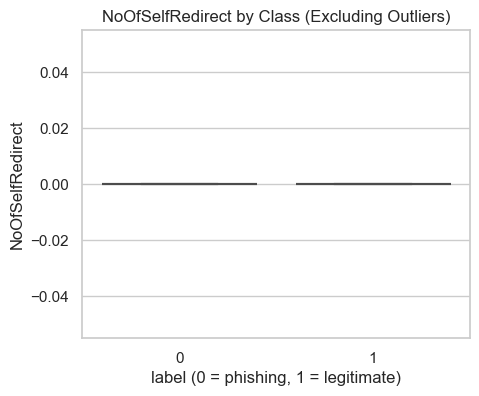

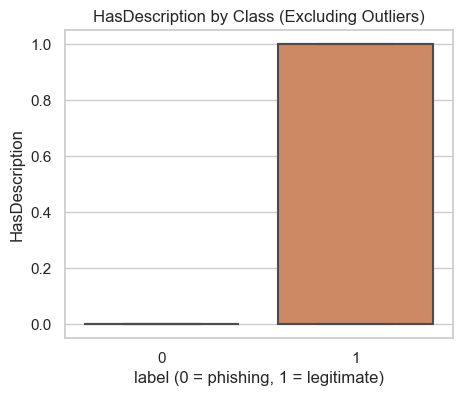

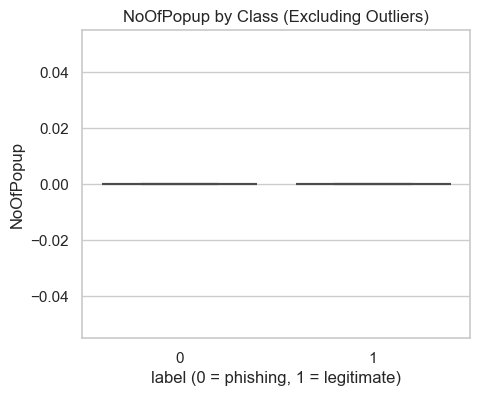

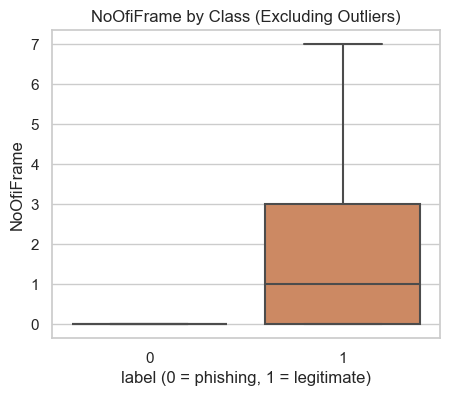

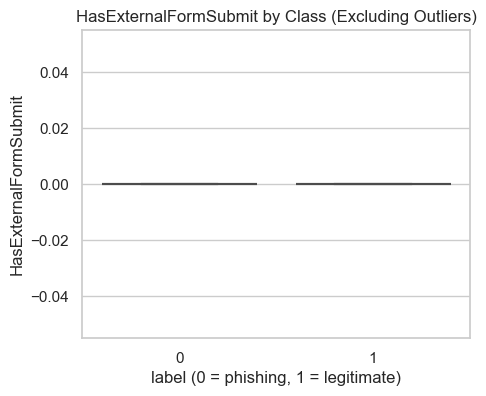

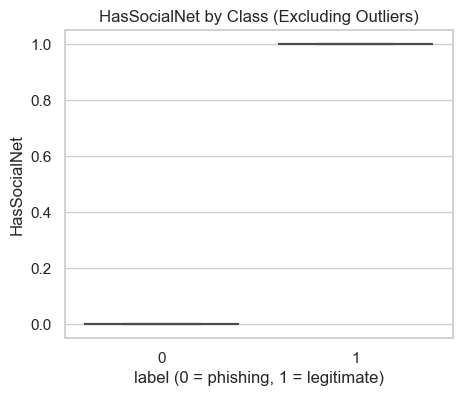

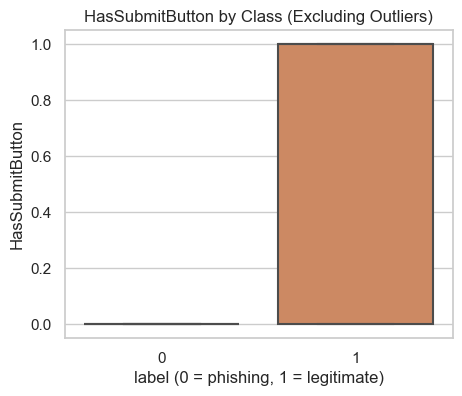

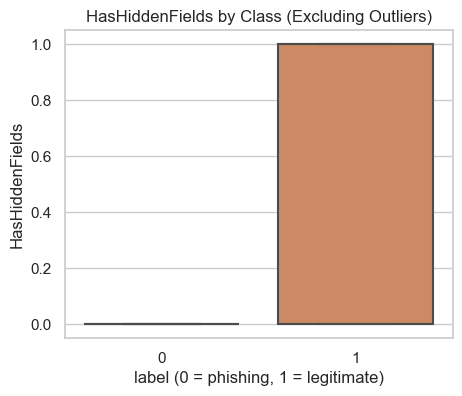

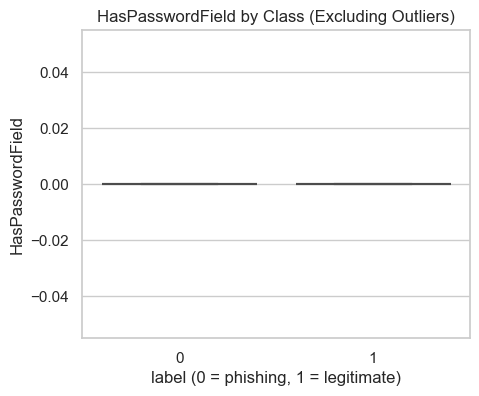

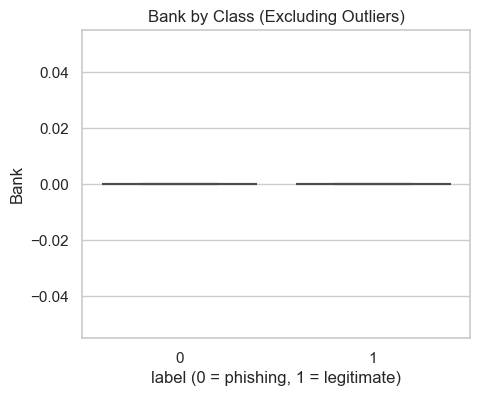

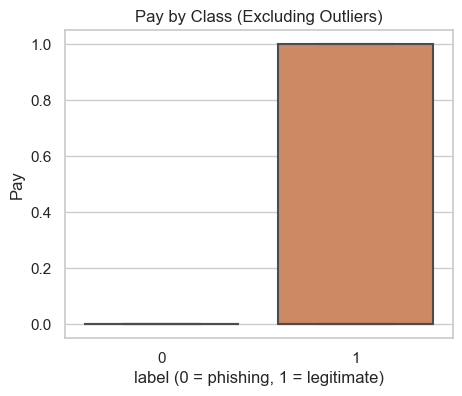

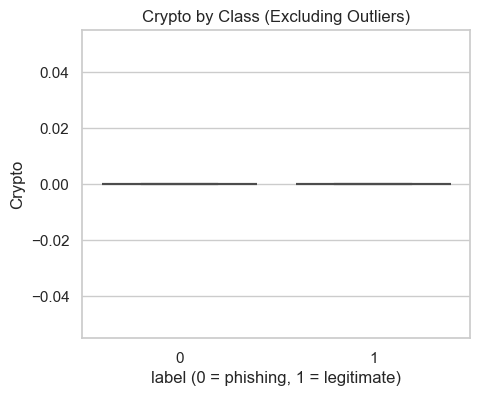

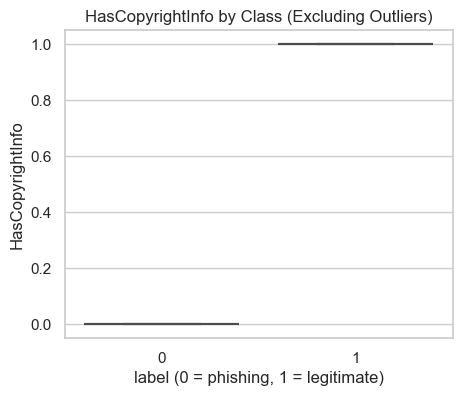

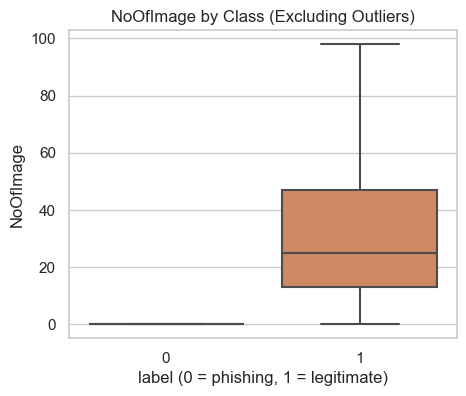

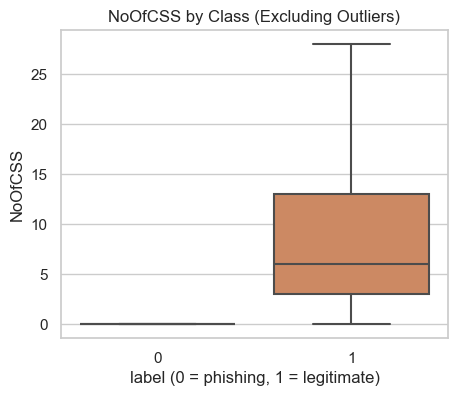

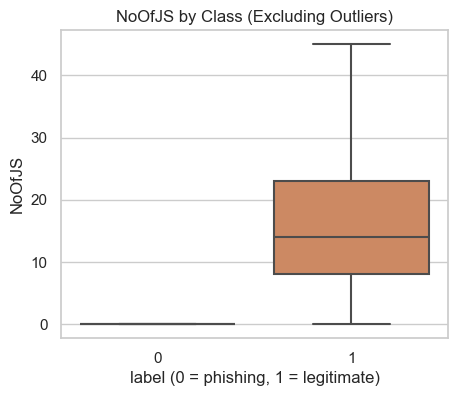

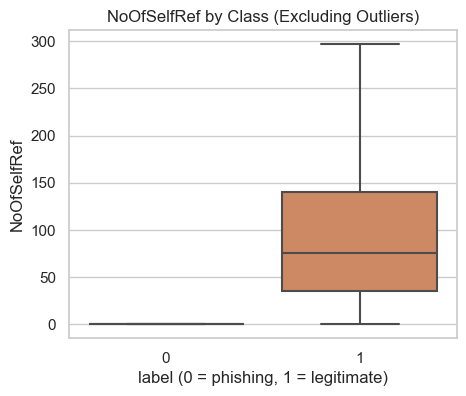

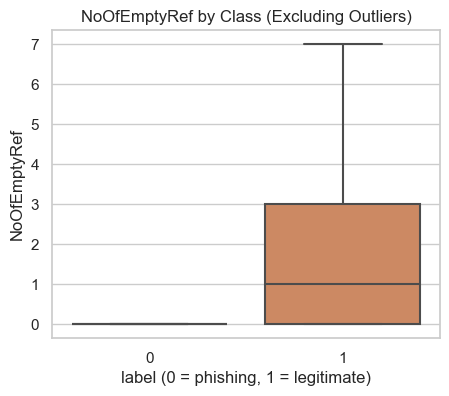

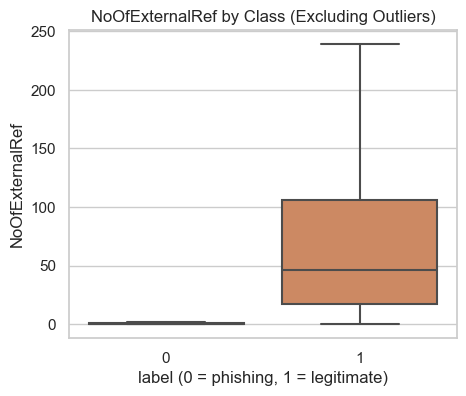

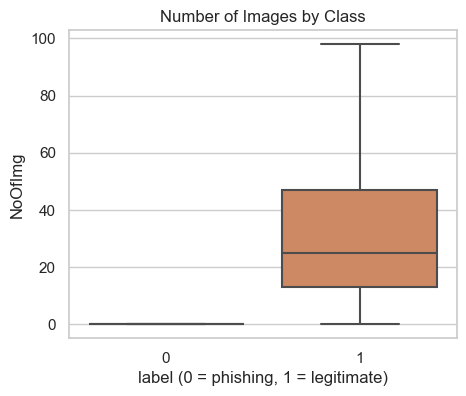

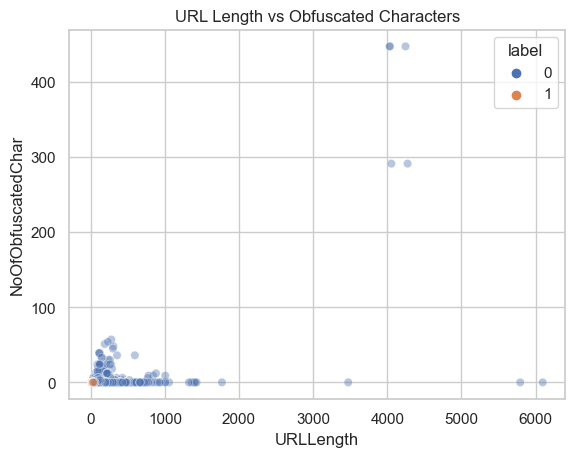

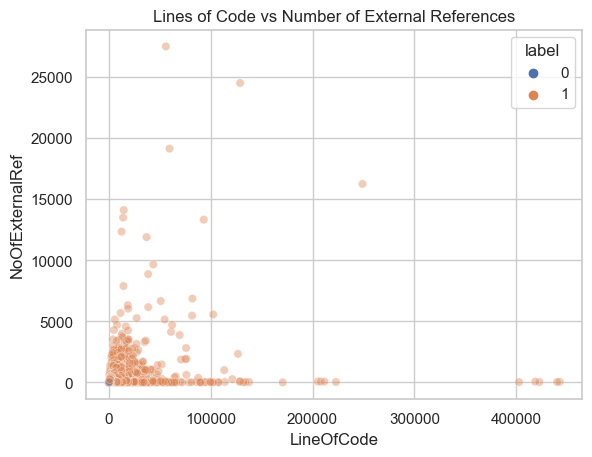

In [ ]:
#Relationships
##Correlations
###CorrMap
num_cols = df_dedup.select_dtypes(include="number").columns
plt.figure(figsize=(len(num_cols), len(num_cols)))
corr = df_dedup[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Between All Numeric Features")
plt.tight_layout()
plt.show()

###Collecting most correlated data
corr_with_label = (
    df_dedup.corr(numeric_only=True)["label"]
    .drop("label")
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

num_cols = df_dedup.select_dtypes(include="number").columns.drop("label")
corr = df_dedup[num_cols].corr()

corr_long = (
    corr
    .where(~np.eye(corr.shape[0], dtype=bool))   # drop diagonal
    .stack()                                     # (feature1, feature2) -> value
    .reset_index()
)
corr_long.columns = ["feature_1", "feature_2", "corr"]

corr_long["abs_corr"] = corr_long["corr"].abs()
corr_sorted = corr_long.sort_values("abs_corr", ascending=False)

###Largest Correlation with Label
top_n = 10
top_corr = corr_sorted.head(top_n)
print(top_corr)

print(corr_with_label.head(10))

#Scatter plots with Strongest Correlation
pairs = [
    ("DomainTitleMatchScore", "URLTitleMatchScore"),
    ("URLLength", "NoOfLettersInURL"),
    ("URLLength", "NoOfDegitsInURL"),
    ("NoOfDegitsInURL", "NoOfEqualsInURL"),
    ("HasObfuscation", "ObfuscationRatio"),
]

for x, y in pairs:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(
        data=df_dedup,
        x=x,
        y=y,
        hue="label",
        alpha=0.4
    )
    plt.title(f"{y} vs {x} (by class)")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

#Bar Charts of Correlation with label
top_corr_with_label = [
    "URLSimilarityIndex",
    "HasSocialNet",
    "HasCopyrightInfo",
    "HasDescription",
    "IsHTTPS",
    "DomainTitleMatchScore",
    "HasSubmitButton",
    "IsResponsive",
    "URLTitleMatchScore",
    "SpacialCharRatioInURL",
]

plt.figure(figsize=(6, 4))
corr_label = (
    df_dedup[top_corr_with_label + ["label"]]
    .corr(numeric_only=True)["label"]
    .drop("label")
    .sort_values(key=lambda s: s.abs(), ascending=True)
)

sns.barplot(
    x=corr_label.values,
    y=corr_label.index,
    orient="h",
    palette="coolwarm"
)
plt.title("Correlation with label")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()

#BoxPlots (Outlers vs. OutlierExclusion)
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_dedup, 
                x="label", 
                y=col
               )
    plt.title(f"{col} by Class")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df_dedup, 
                x="label", 
                y=col,
                showfliers=False
               )
    plt.title(f"{col} by Class (Excluding Outliers)")
    plt.xlabel("label (0 = phishing, 1 = legitimate)")
    plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(data=df_dedup, x="label", y="NoOfImage", showfliers=False)
plt.title("Number of Images by Class")
plt.xlabel("label (0 = phishing, 1 = legitimate)")
plt.ylabel("NoOfImg")
plt.show()

#ScatterPlots
## URL Len vs. Obfu Char
sns.scatterplot(
    data=df_dedup,
    x="URLLength",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Obfuscated Characters")
plt.show()

##Lines of Code vs. Externel Ref.
sns.scatterplot(
    data=df_dedup,
    x="LineOfCode",
    y="NoOfExternalRef",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Number of External References")
plt.show()

##Lines of Code vs. Obfuschar
sns.scatterplot(
    data=df_dedup,
    x="LineOfCode",
    y="NoOfObfuscatedChar",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Obfuscated Characters")
plt.show()

##Char Cont Rate vs. LOC
sns.scatterplot(
    data=df_dedup,
    x="LineOfCode",
    y="CharContinuationRate",
    hue="label",
    alpha=0.4
)
plt.title("Lines of Code vs Char Continuation Rate")
plt.show()

#Popups vs Images
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_dedup,
    x="NoOfPopup",
    y="NoOfImage",
    hue="label",
    alpha=0.5
)
plt.title("Popups vs Images by Class")
plt.xlabel("NoOfPopup")
plt.ylabel("NoOfImg")
plt.show()

#Strip Plot 
##HTTPS vs. URLLength
sns.stripplot(
    data=df_dedup,
    x="IsHTTPS",
    y="URLLength",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("URL Length vs HTTPS (with Class)")
plt.show()

##HasSocialNet vs Line of Code
sns.stripplot(
    data=df_dedup,
    x="HasSocialNet",
    y="LineOfCode",
    hue="label",
    dodge=True,
    alpha=0.5
)
plt.title("Lines of Code by Social Network Presence and Class")
plt.xlabel("HasSocialNet (0 = no, 1 = yes)")
plt.show()

sns.scatterplot(
    data=df_dedup,
    x="URLLength",
    y="NoOfSubDomain",
    hue="label",
    alpha=0.4
)
plt.title("URL Length vs Number of Subdomains")
plt.show()



#Any New features that could be added or created from existing features. 
Currently our dataset could be split into 4 groups. URL Structure, Character Structure, HTML, and MetaData. 
Starting with URLStructure, we would be able to collect parse our information from the URL like if it ends in a executable extenstion like .exe or .zip. You could also determine if the URL has country codes and which ones are used. 

For character structures, 
There are specific characters that are tied to query like functions, instead of counting each instance of them, we could combine the NoOfEqualsInURL, NoOfQMarkInURL, and NoOfAmpersandInURL into one. These features are correlated with phishing sites. 

For HTML Content,
we could collate all resources that are on the HTML page into one large "resource" feature. Another possible avenue is to create the a ratio of empty references to total amount of references. Its likely that a phishing site just has alot of dead links. 

For metadata,
We could collect how long the domain has been active and the last time the link has been updated. 

In [ ]:
#Maybe get rid of this, if you cant find a place
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='URLLength', hue='label', bins=50, kde=False, element='step')
plt.title('URL Length by Label (0=Phish, 1=legit)')
plt.xlim(0, 300)
plt.show()

df.groupby('label')['URLLength'].agg(['count','min','max','mean','median'])

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='label', y='URLLength', showfliers=False)
plt.ylim(0, 200)   # adjust upper limit until the box is readable
plt.title('URLLength by label (outliers hidden)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# phishing
sns.histplot(df[df['label']==0]['URLLength'], bins=100, ax=axes[0])
axes[0].set_title('Label 0 (phish)')
axes[0].set_xlim(0, 300)   # zoom so bars are visible

# legit
legit = df[df['label']==1]['URLLength']
sns.histplot(legit, bins=20, ax=axes[1])
axes[1].set_title('Label 1 (legit)')
axes[1].set_xlim(legit.min()-2, legit.max()+2)

plt.tight_layout()
plt.show()